# Social & Information Networks (CSE3021) J Component
## Analysis of International Air Traffic to and from India
#### Team Members:
1. S Arun                       (19BCE1106)
2. Shreya Thiagarajan  (19BCE1139)
3. Vineeth Victor           (19BCE1792)
4. T Rahul Reddy          (19BCE1778)

#### Imporing Dependencies

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import os
import operator
import warnings
import networkx_old as nxo
import numpy as np 
import pandas as pd
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import Normalize, LinearSegmentedColormap, PowerNorm
from mpl_toolkits.mplot3d import Axes3D
from gcmap import GCMapper, Gradient
from subprocess import check_output
warnings.filterwarnings('ignore')

#### Importing Airport & Route Dataset

In [2]:
G_df = pd.read_csv('routes.csv')
cols_list=["City","Country","IATA"]
airport_df = pd.read_csv('airports.csv',usecols=cols_list)

In [3]:
G_df.head(10) #route dataframe

Airline Airline ID Source airport Source airport ID Destination airport  \
0      2B        410            AER              2965                 KZN   
1      2B        410            ASF              2966                 KZN   
2      2B        410            ASF              2966                 MRV   
3      2B        410            CEK              2968                 KZN   
4      2B        410            CEK              2968                 OVB   
5      2B        410            DME              4029                 KZN   
6      2B        410            DME              4029                 NBC   
7      2B        410            DME              4029                 TGK   
8      2B        410            DME              4029                 UUA   
9      2B        410            EGO              6156                 KGD   

  Destination airport ID Codeshare  Stops Equipment  
0                   2990       NaN      0       CR2  
1                   2990       NaN      0       CR2  
2                   2962       NaN      0       CR2  
3                   2990       NaN      0       CR2  
4                   4078       NaN      0       CR2  
5                   2990       NaN      0       CR2  
6                   6969       NaN      0       CR2  
7                     \N       NaN      0       CR2  
8                   6160       NaN      0       CR2  
9                   2952       NaN      0       CR2

In [4]:
airport_df.head(10) #aiport dataframe

City           Country IATA
0        Goroka  Papua New Guinea  GKA
1        Madang  Papua New Guinea  MAG
2   Mount Hagen  Papua New Guinea  HGU
3        Nadzab  Papua New Guinea  LAE
4  Port Moresby  Papua New Guinea  POM
5         Wewak  Papua New Guinea  WWK
6  Narssarssuaq         Greenland  UAK
7      Godthaab         Greenland  GOH
8   Sondrestrom         Greenland  SFJ
9         Thule         Greenland  THU

In [5]:
#filtering out the indian aiports along with the IATA aiport code from the global aiports dataframe
Ind = airport_df[airport_df['Country'] == 'India']
Ind_cities = Ind['City'].unique()
Ind_Iata = Ind['IATA'].unique()
print(Ind_cities)
print(Ind_Iata)

['Ahmedabad' 'Akola' 'Aurangabad' 'Mumbai' 'Bilaspur' 'Bhuj' 'Belgaum'
 'Baroda' 'Bhopal' 'Bhaunagar' 'Daman' 'Deesa' 'Guna' 'Goa' 'Indore'
 'Jabalpur' 'Jamnagar' 'Kandla' 'Khajuraho' 'Kolhapur' 'Keshod' 'Nagpur'
 'Nasik Road' 'Pune' 'Porbandar' 'Rajkot' 'Raipur' 'Sholapur' 'Surat'
 'Udaipur' 'Along' 'Agartala' 'Aizwal' 'Baghdogra' 'Bokaro' 'Bhubaneswar'
 'Kolkata' 'Cooch-behar' 'Dhanbad' 'Gaya' 'Hirakud' 'Imphal' 'Jharsuguda'
 'Jamshedpur' 'Jorhat' 'Kailashahar' 'Silchar' 'Lilabari' 'Mohanbari'
 'Mazuffarpur' 'Nawapara' 'Panagarh' 'Patina' 'Purnea' 'Ranchi' 'Rourkela'
 'Utkela' 'Vishakhapatnam' 'Zero' 'Agra' 'Allahabad' 'Amritsar' 'Bikaner'
 'Bakshi Ka Talab' 'Varanasi' 'Kulu' 'Bhatinda' 'Bhiwani' 'Bareilly'
 'Chandigarh' 'Kanpur' 'Delhi' 'Dehra Dun' 'Gwalior' 'Hissar' 'Jhansi'
 'Jodhpur' 'Jaipur' 'Jaisalmer' 'Jammu' 'Kota' 'Ludhiaha' 'Leh' 'Lucknow'
 'Pathankot' 'Patiala' 'Nainital' 'Raibarelli' 'Saharanpur' 'Srinagar'
 'Satna' 'Agatti Island' 'Bangalore' 'Bellary' 'Bidar' 'Vijayawad

#### Visualisation of the Air Traffic Network to India

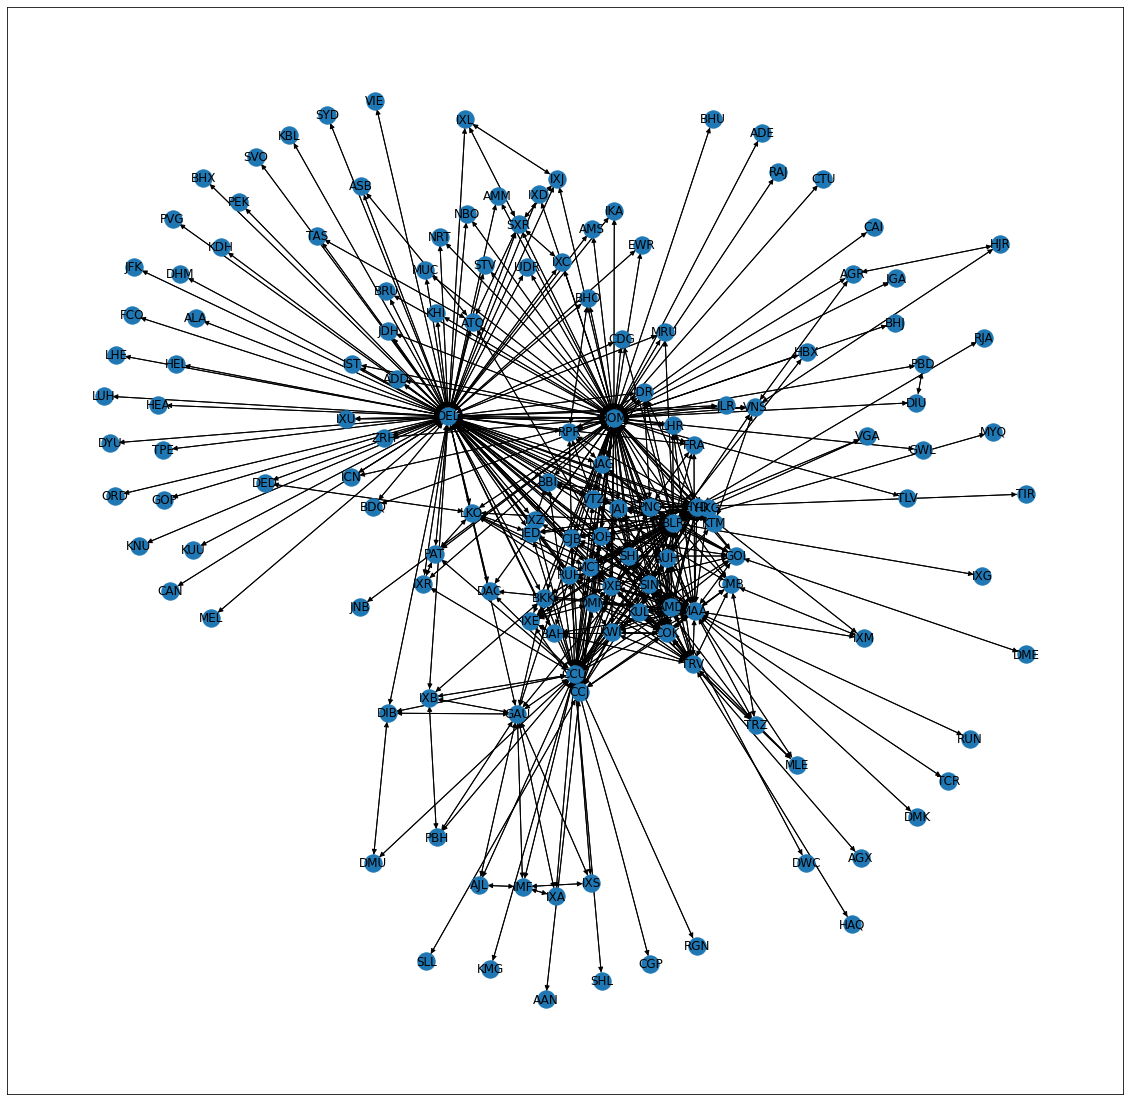

In [6]:
G_draw = nx.from_pandas_edgelist(G_df[G_df['Destination airport'].isin(Ind_Iata)], 'Source airport', 'Destination airport')
G_draw = nx.DiGraph(G_draw)
fig = plt.figure(figsize=(20,20))
nx.draw_networkx(G_draw,pos = nx.spring_layout(G_draw),with_labels=True)
fig.savefig('to_indian_aiports.svg') 

#### Visualisation of the Air Traffic Network from India

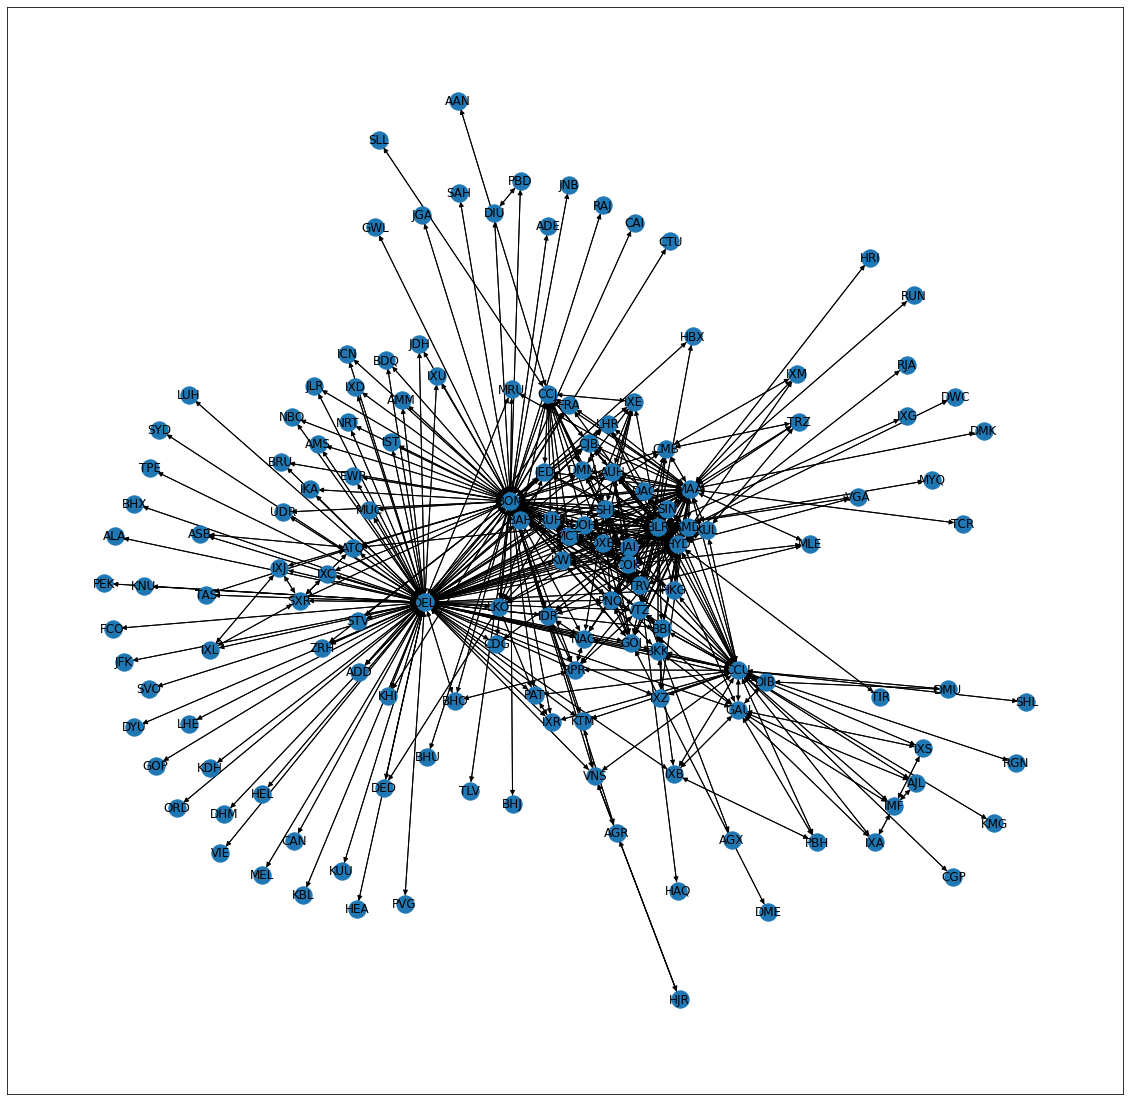

In [7]:
G_draw = nx.from_pandas_edgelist(G_df[G_df['Source airport'].isin(Ind_Iata)], 'Source airport', 'Destination airport')
G_draw = nx.DiGraph(G_draw)
fig = plt.figure(figsize=(20,20))
nx.draw_networkx(G_draw,pos = nx.spring_layout(G_draw),with_labels=True)
fig.savefig('from_indian_aiports.svg') 

In [8]:
#prints out the structural information (like no of nodes and edges) about the air route graph
G = nx.from_pandas_edgelist(G_df, 'Source airport', 'Destination airport',create_using=nx.DiGraph())
print(nx.info(G))

DiGraph with 3425 nodes and 37595 edges


## Connectedness

#### Checking connectedness of airports

In [9]:
#this cell checks if every aiport is connected to every other airport
nx.is_strongly_connected(G), nx.is_connected(G.to_undirected())

(False, False)

#### Weakly and Strongly Connected Components

In [10]:
wccs = nx.weakly_connected_components(G)
x=len(max(wccs, key=len))
print("No of nodes in the largest weakly connected sub-graph = ",x)
print("Percentage of weakly connected components in the whole graph = ",(x/len(G.nodes()))*100)
#we can infer that 99% sub-graphs in the whole graph are weakly connected

No of nodes in the largest weakly connected sub-graph =  3397
Percentage of weakly connected components in the whole graph =  99.18248175182481


In [11]:
sccs = nx.strongly_connected_components(G)
x=len(max(sccs, key=len))
print("No of nodes in the largest strongly connected sub-graph = ",x)
print("Percentage of strongly connected components in the whole graph = ",(x/len(G.nodes()))*100)
#we can infer that 97% sub-graphs in the whole graph are strongly connected 

No of nodes in the largest strongly connected sub-graph =  3354
Percentage of strongly connected components in the whole graph =  97.92700729927007


### Computing Average Shortest Path Length
* Average shortest path length is only calculated for graphs that have weakly connected components

##### Average Shortest Path Length for the largest strongly connected sub-graph

In [12]:
scc_subs = nxo.strongly_connected_component_subgraphs(G)
#fetching the largest strongly connected subgraph
G_sc = max(scc_subs, key=len)
shortest_sc=nxo.average_shortest_path_length(G_sc)
shortest_sc

4.125979351521906

In [13]:
print("No of edges per node in strongly connected sub-graphs = ",len(G_sc.edges())/len(G_sc.nodes()))

No of edges per node in strongly connected sub-graphs =  11.178294573643411


##### Average Shortest Path Length for the largest weakly connected sub-graph

In [14]:
wcc_subs = nxo.weakly_connected_component_subgraphs(G)
#fetching the largest weakly connected subgraph
G_wc = max(wcc_subs, key=len)
shortest_wc=nxo.average_shortest_path_length(G_wc)
shortest_wc

4.093938981010404

In [15]:
print("No of edges per node in weakly connected sub-graphs = ",len(G_wc.edges())/len(G_wc.nodes()))

No of edges per node in weakly connected sub-graphs =  11.052987930526935


##### From the above analysis, we can infer that the average shortest path length is less for the weakly connected subgraphs, even though the no of edges per node is higher in the strongly connected subgraphs.

### Density of a network

In [16]:
print("Density of whole graph: ",nx.density(G))
print("Density of strongly connected sub-graph: ",nx.density(G_sc))

Density of whole graph:  0.003205795074698138
Density of strongly connected sub-graph:  0.003333818840931527


### Visualising the Degree of Nodes in the whole graph

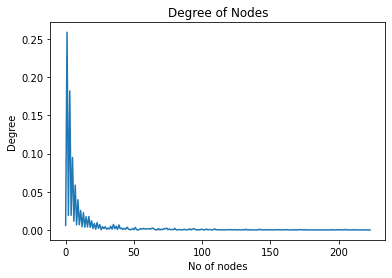

In [17]:
degrees = dict(G.degree())
degree_values = sorted(set(degrees.values()))
histogram = [list(degrees.values()).count(i)/float(nx.number_of_nodes(G_sc)) for i in degree_values]
plt.ylabel("Degree")
plt.xlabel("No of nodes")
plt.title("Degree of Nodes")
plt.plot(histogram)

### Diameter & Radius
Note: Diameter and Radius of weakly connected component will be infinity

In [18]:
diameter=nx.diameter(G_sc)
print("Diameter of Strongly Connected Component: ",diameter)

Diameter of Strongly Connected Component:  14


In [19]:
radius=nx.radius(G_sc)
print("Radius of Strongly Connected Component: ",radius)

Radius of Strongly Connected Component:  7


##### Diameter represents the greatest possibe no of airports between any two aiports, we can infer that a max of 14 airports are between any two airports in the strongly connected sub-graph
##### Radius represents an airport from which every other airport is at a minimum no of airports apart, we can infer that every airport is away from a minimum of 7 airports to every other airports

### Periphery and Center
* Set of nodes which have eccentricity equal to diameter
* Set of nodes eccentricity equal to the radius

In [20]:
per=nx.periphery(G_sc)
print("Nodes which have eccentricity equal to diameter: ",per)

Nodes which have eccentricity equal to diameter:  ['YZG', 'XEQ', 'KCG', 'YPO']


In [21]:
airport_df.loc[airport_df['IATA'].isin(per)]

City Country IATA
4228  Peawanuck  Canada  YPO
4241    Salluit  Canada  YZG

In [22]:
cen=nx.center(G_sc)
print("Nodes which have eccentricity equal to radius: ",cen)

Nodes which have eccentricity equal to radius:  ['CPH', 'KEF']


In [23]:
airport_df.loc[airport_df['IATA'].isin(cen)]

City  Country IATA
15     Keflavik  Iceland  KEF
601  Copenhagen  Denmark  CPH

### Analysing the Strongly connected Component
#### Finding out the nodes which are connected to most of the other nodes where the shortest path of length = diameter of strongly connected component

In [24]:
max_count = -1
result_node = None
for node in per:
    count = 0
    sp = nx.shortest_path_length(G_sc, node)
    for key, value in sp.items():
        if value == diameter:
            count += 1        
    if count > max_count:
        result_node = node
        max_count = count

result_node, max_count

('XEQ', 5)

In [25]:
airport_df.loc[airport_df['IATA'] == result_node]

Empty DataFrame
Columns: [City, Country, IATA]
Index: []

#### Finding out the nodes which are connected to most of the other nodes where the shortest path of length = radius of strongly connected component

In [26]:
d = radius
max_count = -1
result_node = None
for node in cen:
    count = 0
    sp = nx.shortest_path_length(G_sc, node)
    for key, value in sp.items():
        if value == radius:
            count += 1        
    if count > max_count:
        result_node = node
        max_count = count

result_node, max_count

('KEF', 8)

In [27]:
airport_df.loc[airport_df['IATA'] == result_node]

City  Country IATA
15  Keflavik  Iceland  KEF

### Transitivity and Average Clustering Coefficient of Strongly Connected Component

In [28]:
print("Transitivity: ",nx.transitivity(G_sc))
print("Average Clustering Coefficient: ",nx.average_clustering(G_sc))

Transitivity:  0.24878205149750107
Average Clustering Coefficient:  0.47733508870492014


### Transitivity and Average Clustering Coefficient of Weakly Connected Component

In [29]:
print("Transitivity: ",nx.transitivity(G_wc))
print("Average Clustering Coefficient: ",nx.average_clustering(G_wc))

Transitivity:  0.24864166946590527
Average Clustering Coefficient:  0.4708160157290989


### In-degree & Out-degree

In [30]:
in_deg=nx.in_degree_centrality(G_sc)

In [31]:
out_deg=nx.out_degree_centrality(G_sc)

#### Top 5 airports with most incoming flights

In [32]:
top5=sorted(in_deg.items(), key=operator.itemgetter(1),reverse=True)[:5]
print("In-Degree Values:\n",top5)
l=[]
for i,j in top5:
    l.append(i)
airport_df.loc[airport_df['IATA'].isin(l)]

In-Degree Values:
 [('FRA', 0.0709812108559499), ('CDG', 0.06919176856546377), ('AMS', 0.06889352818371608), ('IST', 0.06859528780196839), ('ATL', 0.06441992245750075)]


City        Country IATA
336   Frankfurt        Germany  FRA
574   Amsterdam    Netherlands  AMS
1346      Paris         France  CDG
3482    Atlanta  United States  ATL
7629   Istanbul         Turkey  IST

#### Top 15 Indian airports with most incoming flights

In [33]:
all_in_deg=nx.in_degree_centrality(G)
all_out_deg=nx.out_degree_centrality(G)

In [34]:
India_in_deg = {}
for x in all_in_deg.keys():
    if x in Ind_Iata:
        India_in_deg[x] = all_in_deg[x]
top = sorted(India_in_deg.items(), key=operator.itemgetter(1),reverse=True)
indian_in_deg_df = pd.DataFrame(top, columns = ["IATA", "In Degree"])
indian_in_deg_df.head(15)

IATA  In Degree
0   DEL   0.028329
1   BOM   0.023949
2   BLR   0.011974
3   MAA   0.011098
4   CCU   0.010806
5   HYD   0.009346
6   COK   0.006425
7   AMD   0.005257
8   TRV   0.004965
9   CCJ   0.004673
10  PNQ   0.003797
11  GOI   0.003505
12  GAU   0.003505
13  JAI   0.002629
14  VTZ   0.002629

#### Top 5 airports with least incoming flights

In [35]:
bot5=sorted(in_deg.items(), key=operator.itemgetter(1))[:5]
print("In-Degree Values:\n",bot5)
l=[]
for i,j in bot5:
    l.append(i)
airport_df.loc[airport_df['IATA'].isin(l)]

In-Degree Values:
 [('TGK', 0.00029824038174768865), ('KCK', 0.00029824038174768865), ('ODO', 0.00029824038174768865), ('UKX', 0.00029824038174768865), ('AYP', 0.00029824038174768865)]


City Country IATA
2648  Ayacucho    Peru  AYP
5246   Kirensk  Russia  KCK
5247   Ust-Kut  Russia  UKX
5254  Taganrog  Russia  TGK
6404   Bodaibo  Russia  ODO

#### Top 15 Indian airports with least incoming flights

In [36]:
India_in_deg = {}
for x in all_in_deg.keys():
    if x in Ind_Iata:
        India_in_deg[x] = all_in_deg[x]
top = sorted(India_in_deg.items(), key=operator.itemgetter(1))
indian_in_deg_df = pd.DataFrame(top, columns = ["IATA", "In Degree"])
indian_in_deg_df.head(15)

IATA  In Degree
0   BHJ   0.000292
1   BHU   0.000292
2   DIU   0.000292
3   RAJ   0.000292
4   GOP   0.000292
5   PBD   0.000292
6   RJA   0.000292
7   HJR   0.000292
8   AGX   0.000292
9   GWL   0.000292
10  JGA   0.000292
11  SHL   0.000292
12  DHM   0.000292
13  KNU   0.000292
14  KUU   0.000292

#### Top 5 airports with the most outgoing flights

In [37]:
top5=sorted(out_deg.items(), key=operator.itemgetter(1),reverse=True)[:5]
print("Out-Degree Values:\n",top5)
l=[]
for i,j in top5:
    l.append(i)
airport_df.loc[airport_df['IATA'].isin(l)]

Out-Degree Values:
 [('FRA', 0.07127945123769759), ('CDG', 0.07068297047420222), ('AMS', 0.06919176856546377), ('IST', 0.06770056665672533), ('ATL', 0.06471816283924844)]


City        Country IATA
336   Frankfurt        Germany  FRA
574   Amsterdam    Netherlands  AMS
1346      Paris         France  CDG
3482    Atlanta  United States  ATL
7629   Istanbul         Turkey  IST

#### Top 15 Indian airports with most outgoing flights

In [38]:
India_out_deg = {}
for x in all_out_deg.keys():
    if x in Ind_Iata:
        India_out_deg[x] = all_out_deg[x]
top = sorted(India_out_deg.items(), key=operator.itemgetter(1),reverse=True)
indian_out_deg_df = pd.DataFrame(top, columns = ["IATA", "Out Degree"])
indian_out_deg_df.head(15)

IATA  Out Degree
0   DEL    0.028329
1   BOM    0.024241
2   BLR    0.011682
3   MAA    0.011682
4   CCU    0.010806
5   HYD    0.009346
6   COK    0.006425
7   AMD    0.005257
8   CCJ    0.005257
9   TRV    0.004965
10  GOI    0.003505
11  PNQ    0.003505
12  GAU    0.003505
13  JAI    0.002629
14  LKO    0.002629

#### Top 5 airports with the least outgoing flights

In [39]:
bot5=sorted(out_deg.items(), key=operator.itemgetter(1))[:5]
print("Out-Degree Values:\n",bot5)
l=[]
for i,j in bot5:
    l.append(i)
airport_df.loc[airport_df['IATA'].isin(l)]

Out-Degree Values:
 [('TGK', 0.00029824038174768865), ('KCK', 0.00029824038174768865), ('ODO', 0.00029824038174768865), ('UKX', 0.00029824038174768865), ('AYP', 0.00029824038174768865)]


City Country IATA
2648  Ayacucho    Peru  AYP
5246   Kirensk  Russia  KCK
5247   Ust-Kut  Russia  UKX
5254  Taganrog  Russia  TGK
6404   Bodaibo  Russia  ODO

#### Top 15 Indian airports with least outgoing flights

In [40]:
India_out_deg = {}
for x in all_out_deg.keys():
    if x in Ind_Iata:
        India_out_deg[x] = all_out_deg[x]
top = sorted(India_out_deg.items(), key=operator.itemgetter(1))
indian_out_deg_df = pd.DataFrame(top, columns = ["IATA", "Out Degree"])
indian_out_deg_df.head(15)

IATA  Out Degree
0   BHJ    0.000292
1   BHU    0.000292
2   DIU    0.000292
3   RAJ    0.000292
4   GOP    0.000292
5   PBD    0.000292
6   RJA    0.000292
7   HJR    0.000292
8   AGX    0.000292
9   GWL    0.000292
10  JGA    0.000292
11  SHL    0.000292
12  DHM    0.000292
13  KNU    0.000292
14  KUU    0.000292

### Closeness Centrality

In [41]:
closeness = nx.closeness_centrality(G_sc, wf_improved=True)

#### Airports that allows us to reach all other airports with the lowest average number of airports in between

In [42]:
close=sorted(closeness.items(), key=operator.itemgetter(1),reverse=True)[:5]
l=[]
for i,j in close:
    l.append(i)
airport_df.loc[airport_df['IATA'].isin(l)]

City               Country IATA
336   Frankfurt               Germany  FRA
502      London        United Kingdom  LHR
574   Amsterdam           Netherlands  AMS
1346      Paris                France  CDG
2100      Dubai  United Arab Emirates  DXB

#### Top 15 Indian airports with highest closeness centrality

In [43]:
India_close = {}
for x in closeness.keys():
    if x in Ind_Iata:
        India_close[x] = closeness[x]
top = sorted(India_close.items(), key=operator.itemgetter(1),reverse=True)
indian_close_df = pd.DataFrame(top, columns = ["IATA", "Closeness"])
indian_close_df.head(15)

IATA  Closeness
0   DEL   0.348508
1   BOM   0.332903
2   BLR   0.315814
3   MAA   0.312401
4   HYD   0.305457
5   CCU   0.298363
6   PNQ   0.294407
7   COK   0.293762
8   AMD   0.293274
9   TRV   0.292966
10  GOI   0.291743
11  CCJ   0.288133
12  LKO   0.285168
13  IXE   0.283552
14  ATQ   0.277245

#### Airports that allows us to reach all other airports with the highest average number of airports in between

In [44]:
close=sorted(closeness.items(), key=operator.itemgetter(1))[:18]
l=[]
for i,j in close:
    l.append(i)
airport_df.loc[airport_df['IATA'].isin(l)]

City           Country IATA
9          Thule         Greenland  THU
1009       Isiro  Congo (Kinshasa)  IRP
4228   Peawanuck            Canada  YPO
4241     Salluit            Canada  YZG
5409  Perryville     United States  KPV

#### Top 15 Indian airports with lowest closeness centrality

In [45]:
India_close = {}
for x in closeness.keys():
    if x in Ind_Iata:
        India_close[x] = closeness[x]
top = sorted(India_close.items(), key=operator.itemgetter(1))
indian_close_df = pd.DataFrame(top, columns = ["IATA", "Closeness"])
indian_close_df.head(15)

IATA  Closeness
0   PBD   0.199893
1   HJR   0.199905
2   AGX   0.227076
3   SHL   0.229815
4   DMU   0.229831
5   IXA   0.229846
6   AJL   0.229846
7   IXS   0.229846
8   IMF   0.229878
9   RJA   0.234001
10  TIR   0.234001
11  IXZ   0.239517
12  IXG   0.240031
13  MYQ   0.240031
14  VGA   0.240117

### Betweenness Centrality

In [46]:
betweeness = nx.betweenness_centrality(G_sc, normalized=True)

#### Airports that most often act as a bridge between other pairs of airports

In [47]:
betw=sorted(betweeness.items(), key=operator.itemgetter(1),reverse=True)[:5]
l=[]
for i,j in betw:
    l.append(i)
airport_df.loc[airport_df['IATA'].isin(l)]

City               Country IATA
336     Frankfurt               Germany  FRA
1346        Paris                France  CDG
2100        Dubai  United Arab Emirates  DXB
3285  Los Angeles         United States  LAX
3574    Anchorage         United States  ANC

#### Top 15 Indian Airports that most often act as a bridge between other pairs of airports

In [48]:
ind_betweeness = {}
for x in betweeness.keys():
    if x in Ind_Iata:
        ind_betweeness[x] = betweeness[x]
top = sorted(ind_betweeness.items(), key=operator.itemgetter(1),reverse=True)
indian_betw_df = pd.DataFrame(top, columns = ["IATA", "Betweenness"])
indian_betw_df.head(15)

IATA  Betweenness
0   DEL     0.015452
1   BOM     0.010391
2   CCU     0.004037
3   BLR     0.002234
4   HYD     0.001721
5   MAA     0.001704
6   COK     0.000616
7   TRV     0.000592
8   GAU     0.000409
9   VNS     0.000304
10  DIU     0.000298
11  AGR     0.000298
12  PBD     0.000298
13  CCJ     0.000282
14  LKO     0.000038

### Articulation Point & Bridges
* A node is considered an articulation point if the removal of that node (along with all its incident edges) increases the number of disconnected components of a network
* A bridge in a graph is an edge whose removal causes the number of connected components of the graph to increase.

In [49]:
arti=list(nx.articulation_points(G_sc.to_undirected()))
print("No of Articulation Points in the graph: ",len(arti))

No of Articulation Points in the graph:  331


#### Articulation Points in Indian Air Traffic Network

In [50]:
for x in arti:
    if x in Ind_Iata:
        print(x)

MAA
COK
HYD
BOM
BLR
CCU
DEL


In [51]:
nx.has_bridges(G.to_undirected())
#we can infer that the graph has bridges

True

#### No of airports pairs that act as bridges

In [52]:
l = list(nx.bridges(G_sc.to_undirected()))
final_l = []
for x in l:
    for y in x:
        if y in Ind_Iata:
            final_l.append(x)
for x in set(final_l):
    print(x)

('BOM', 'RAJ')
('COK', 'AGX')
('BOM', 'BHJ')
('BLR', 'MYQ')
('BOM', 'GWL')
('BLR', 'IXG')
('BOM', 'JGA')
('BOM', 'BHU')
('HYD', 'RJA')
('HYD', 'TIR')
('DEL', 'KNU')
('MAA', 'TCR')
('DEL', 'GOP')
('DEL', 'KUU')
('CCU', 'SHL')
('DEL', 'DHM')
('DEL', 'LUH')


In [53]:
l = list(nx.bridges(G_sc.to_undirected()))
print("No of Bridges in the graph: ",len(l))

No of Bridges in the graph:  764


### PageRank

#### Top 5 aiports with highest pagerank

In [54]:
pr = nxo.pagerank(G_sc, alpha=0.85)
#print("Pagerank values:\n",pr)
pager=sorted(pr.items(), key=operator.itemgetter(1),reverse=True)[:5]
l=[]
for i,j in pager:
    l.append(i)
airport_df.loc[airport_df['IATA'].isin(l)]

City        Country IATA
3470  Dallas-Fort Worth  United States  DFW
3482            Atlanta  United States  ATL
3551             Denver  United States  DEN
3630            Chicago  United States  ORD
7629           Istanbul         Turkey  IST

#### Top 15 Indian Aiports with highest pagerank

In [55]:
ind_pgr = {}
for x in pr.keys():
    if x in Ind_Iata:
        ind_pgr[x] = pr[x]
top = sorted(ind_pgr.items(), key=operator.itemgetter(1),reverse=True)
indian_pgr_df = pd.DataFrame(top, columns = ["IATA", "Page Rank"])
indian_pgr_df.head(15)

IATA  Page Rank
0   DEL   0.002358
1   BOM   0.002124
2   CCU   0.001041
3   BLR   0.000952
4   MAA   0.000847
5   HYD   0.000765
6   COK   0.000492
7   GAU   0.000406
8   AMD   0.000387
9   TRV   0.000386
10  CCJ   0.000356
11  PNQ   0.000301
12  GOI   0.000271
13  LKO   0.000250
14  VTZ   0.000232

### HITS


In [56]:
hits = nxo.hits(G_sc)
#hits

#### Good Hubs & Authorities
* Good Hubs are those nodes that are good at pointing at good authorities
* Good Authorities are those nodes that have higher authority scores and higher no of incoming nodes

In [57]:
# hits_df = pd.DataFrame(columns=["IATA","Hub", "Authority"])
# l = len(hits[0])
# i = 0
# for x in Ind_Iata:
#     if hits[0].get(x):
#         hits_df.loc[i] = [x, hits[0][x], hits[1][x]]
#         i+=1
# print(hits_df)

In [58]:
for x in Ind_Iata:
    if hits[1].get(x):
        print(x," : ",hits[0][x], ", ", hits[1][x])

AMD  :  0.00041462102803375327 ,  0.00041550457987932416
IXU  :  6.247356125536419e-05 ,  6.250839461143293e-05
BOM  :  0.001890043776088612 ,  0.0018771079713944796
BHJ  :  2.713736921784039e-05 ,  2.7207616139343914e-05
IXG  :  1.3362506926185294e-05 ,  1.3109270493790411e-05
BDQ  :  6.247356125536419e-05 ,  6.250839461143293e-05
BHO  :  6.247356125536419e-05 ,  6.36969053664013e-05
BHU  :  2.713736921784039e-05 ,  2.7207616139343914e-05
GOI  :  0.00032430342034123807 ,  0.0003232198223312108
IDR  :  9.152597618347638e-05 ,  8.965009197877407e-05
JLR  :  6.247356125536419e-05 ,  6.250839461143293e-05
JGA  :  2.713736921784039e-05 ,  2.7207616139343914e-05
HJR  :  1.1334955847956406e-06 ,  3.907300053579009e-07
NAG  :  0.00010250290657184083 ,  9.998670963101149e-05
PNQ  :  0.00013875196602425823 ,  0.00025430522265859563
PBD  :  2.713736921784039e-05 ,  1.062073992323441e-126
RAJ  :  2.713736921784039e-05 ,  2.7207616139343914e-05
RPR  :  8.256281416670241e-05 ,  8.109302258213618e-0

### Analysis & Results

In [59]:
df = pd.DataFrame()
df['IATA'] = G_sc.nodes()
df['clustering'] = pd.Series(nx.clustering(G_sc))
df['in_degree'] = pd.Series(dict(in_deg))
df['out_degree'] = pd.Series(dict(out_deg))
df['degree_centrality'] = pd.Series(nx.degree_centrality(G))
df['closeness'] = pd.Series(closeness)
df['betweeness'] = pd.Series(betweeness)
df['pr'] = pd.Series(pr)
df['hits_hubs'] = pd.Series(hits[0])
df['hits_auth'] = pd.Series(hits[1])

In [60]:
df.head(10)

IATA  clustering  in_degree  out_degree  degree_centrality  closeness  \
AER  AER    0.525952   0.005368    0.005070           0.010222   0.281836   
KZN  KZN    0.423810   0.006263    0.006263           0.012266   0.283672   
ASF  ASF    0.571429   0.002088    0.002088           0.004089   0.271740   
MRV  MRV    0.495833   0.004772    0.004772           0.009346   0.292022   
CEK  CEK    0.538462   0.004175    0.004175           0.008178   0.273558   
OVB  OVB    0.259246   0.015807    0.015508           0.030666   0.316769   
DME  DME    0.074136   0.056367    0.056367           0.110397   0.341272   
NBC  NBC    0.809524   0.002088    0.002088           0.004089   0.280609   
TGK  TGK    0.000000   0.000298    0.000298           0.000584   0.254459   
UUA  UUA    0.666667   0.000895    0.000895           0.001752   0.259279   

       betweeness        pr  hits_hubs  hits_auth  
AER  2.529012e-05  0.000347   0.000435   0.000437  
KZN  5.094607e-05  0.000409   0.000428   0.000429  
ASF  8.119928e-07  0.000163   0.000229   0.000228  
MRV  3.069963e-05  0.000315   0.000475   0.000478  
CEK  4.533672e-06  0.000277   0.000325   0.000327  
OVB  1.832225e-03  0.001051   0.001094   0.001106  
DME  3.050986e-02  0.004160   0.003685   0.003677  
NBC  6.785994e-07  0.000162   0.000307   0.000305  
TGK  0.000000e+00  0.000063   0.000053   0.000053  
UUA  7.711068e-08  0.000101   0.000101   0.000101

In [61]:
Ind = airport_df[airport_df['Country'] == 'India']
# Ind_cities = Ind['City'].unique()
# Ind_Iata = Ind['IATA'].unique()
final_df = df[df['IATA'].isin(Ind_Iata)]
final_df

IATA  clustering  in_degree  out_degree  degree_centrality  closeness  \
CCU  CCU    0.239489   0.011035    0.011035           0.021612   0.298363   
DEL  DEL    0.187544   0.028929    0.028929           0.056659   0.348508   
AMD  AMD    0.702614   0.005368    0.005368           0.010514   0.293274   
BLR  BLR    0.374063   0.012228    0.011930           0.023657   0.315814   
BOM  BOM    0.202045   0.024456    0.024754           0.048189   0.332903   
..   ...         ...        ...         ...                ...        ...   
TIR  TIR    0.000000   0.000298    0.000298           0.000584   0.234001   
VGA  VGA    1.000000   0.000596    0.000596           0.001168   0.240117   
HBX  HBX    1.000000   0.000596    0.000596           0.001168   0.249851   
IXG  IXG    0.000000   0.000298    0.000298           0.000584   0.240031   
MYQ  MYQ    0.000000   0.000298    0.000298           0.000584   0.240031   

     betweeness        pr  hits_hubs  hits_auth  
CCU    0.004037  0.001041   0.000446   0.000444  
DEL    0.015452  0.002358   0.002452   0.002444  
AMD    0.000022  0.000387   0.000415   0.000416  
BLR    0.002234  0.000952   0.000911   0.000924  
BOM    0.010391  0.002124   0.001890   0.001877  
..          ...       ...        ...        ...  
TIR    0.000000  0.000065   0.000009   0.000009  
VGA    0.000000  0.000085   0.000023   0.000022  
HBX    0.000000  0.000087   0.000040   0.000040  
IXG    0.000000  0.000065   0.000013   0.000013  
MYQ    0.000000  0.000065   0.000013   0.000013  

[71 rows x 10 columns]

In [62]:
final_df.to_csv('final_result.csv')

### Visualising the Air Route & Aiport Network of India
#### Top 20 airlines that fly in and out of India
1. JET Airways and AIR INDIA are the undisputed leaders in international flights
2. Emirates comes a close third. Top 4 operators make up 50 % of the total share.
3. The top 10 operators is dominated by middle east flight operators.

<AxesSubplot:title={'center':'2017 Q1 Traffic'}, xlabel='AIRLINE NAME'>

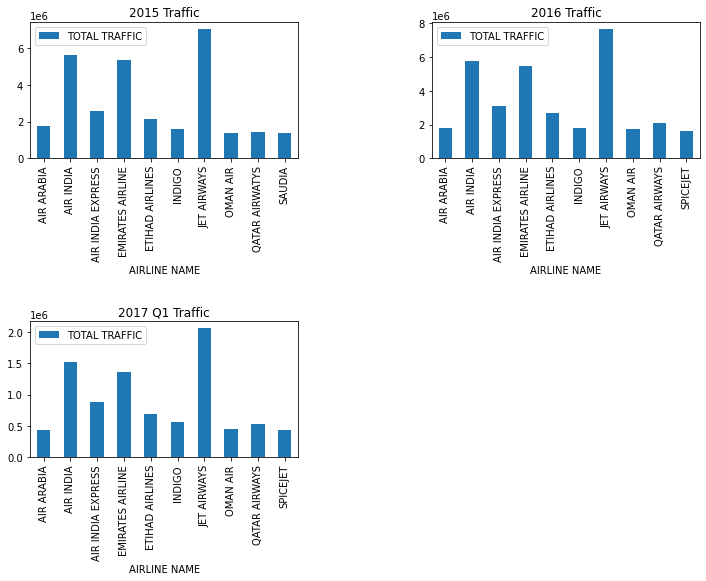

In [63]:
df_traffic_monthly = pd.read_csv("Airlinewise Monthly International Air Traffic To And From The Indian Territory.csv")
df_traffic_passengers = df_traffic_monthly[(df_traffic_monthly['PASSENGERS FROM INDIA'] > 0) | (df_traffic_monthly['PASSENGERS TO INDIA'] > 0)]
df_traffic_passengers_yearly = df_traffic_passengers.groupby(['AIRLINE NAME', 'YEAR'])['PASSENGERS TO INDIA', 'PASSENGERS FROM INDIA'].sum().reset_index()
df_traffic_passengers_yearly['TOTAL TRAFFIC'] = df_traffic_passengers_yearly['PASSENGERS TO INDIA'] + df_traffic_passengers_yearly['PASSENGERS FROM INDIA']
#df_traffic_passengers_from = df_traffic_passengers.groupby(['AIRLINE NAME', 'YEAR'])[].sum().nlargest(20).reset_index(name='FROM COUNT')
#df_traffic_passengers_combined = pd.merge(df_traffic_passengers_to, df_traffic_passengers_from, on='AIRLINE NAME')
#df_traffic_passengers_combined['TOTAL TRAFFIC'] = df_traffic_passengers_combined['FROM COUNT'] + df_traffic_passengers_combined['TO COUNT']
#df_traffic_passengers_combined['OUTBOUND TO INBOUND RATIO'] = df_traffic_passengers_combined['FROM COUNT'] / df_traffic_passengers_combined['TO COUNT']
#df_traffic_passengers_combined.plot(x='AIRLINE NAME', y='TOTAL TRAFFIC', kind='pie', legend=False, autopct='%1.1f%%', labels=df_traffic_passengers_to['AIRLINE NAME'], figsize=(10, 10), title='Top 10 Carrying passengers to India')
df_traffic_2015 = df_traffic_passengers_yearly[df_traffic_passengers_yearly['YEAR'] == 2015]
df_traffic_2015_top10 = df_traffic_2015[df_traffic_2015['TOTAL TRAFFIC'].isin(df_traffic_2015['TOTAL TRAFFIC'].nlargest(10))]
df_traffic_2016 = df_traffic_passengers_yearly[df_traffic_passengers_yearly['YEAR'] == 2016]
df_traffic_2016_top10 = df_traffic_2016[df_traffic_2016['TOTAL TRAFFIC'].isin(df_traffic_2016['TOTAL TRAFFIC'].nlargest(10))]
df_traffic_2017 = df_traffic_passengers_yearly[df_traffic_passengers_yearly['YEAR'] == 2017]
df_traffic_2017_top10 = df_traffic_2017[df_traffic_2017['TOTAL TRAFFIC'].isin(df_traffic_2017['TOTAL TRAFFIC'].nlargest(10))]
fig = plt.figure()
fig.subplots_adjust(hspace=1.2, wspace=.5)
ax = plt.subplot(221)
df_traffic_2015_top10.plot(ax=ax, x='AIRLINE NAME', y='TOTAL TRAFFIC', kind='bar', figsize=(12, 8), title='2015 Traffic')
ax = plt.subplot(222)
df_traffic_2016_top10.plot(ax=ax, x='AIRLINE NAME', y='TOTAL TRAFFIC', kind='bar', title='2016 Traffic')
ax = plt.subplot(223)
df_traffic_2017_top10.plot(ax=ax, x='AIRLINE NAME', y='TOTAL TRAFFIC', kind='bar', title='2017 Q1 Traffic')

### Visualising Month-wise Passenger Traffic & Quarter-wise Passenger Traffic
1. Q1 is undoubtedly the best quarter for air traffic in India
2. There is not much difference when we look at other quarter numbers.

<AxesSubplot:xlabel='MONTH'>

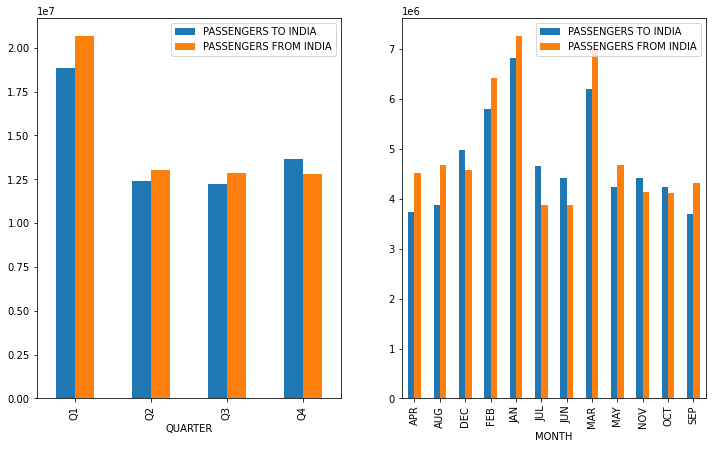

In [64]:
fig, axes = plt.subplots(nrows=1, ncols=2)
df_qtrly = df_traffic_passengers.groupby(['QUARTER'])['PASSENGERS TO INDIA', 'PASSENGERS FROM INDIA'].sum().reset_index()
df_qtrly.plot(x='QUARTER', y=['PASSENGERS TO INDIA', 'PASSENGERS FROM INDIA'], kind='bar', ax=axes[0], figsize=(12, 7))
df_monthly = df_traffic_passengers.groupby(['MONTH'])['PASSENGERS TO INDIA', 'PASSENGERS FROM INDIA'].sum().reset_index()
df_monthly.plot(x='MONTH', y=['PASSENGERS TO INDIA', 'PASSENGERS FROM INDIA'], kind='bar', ax=axes[1], figsize=(12, 7))

### Visualising the Rate of change of Passenger Traffic 
1. We already saw that Q1 has a lion's share of passenger traffic to and from India
2.  Looking at Q1 numbers over 3 years, we can see that passenger traffic has been increasing both ways.
3. Passengers flying in to India has increased by 18.5% over 3 years whereas Passngers flying out from India has increased by 16.3%.

YEAR QUARTER  PASSENGERS TO INDIA  PASSENGERS FROM INDIA
0  2015      Q1            5712230.0                6376365
4  2016      Q1            6343530.0                6871288
8  2017      Q1            6778304.0                7424671

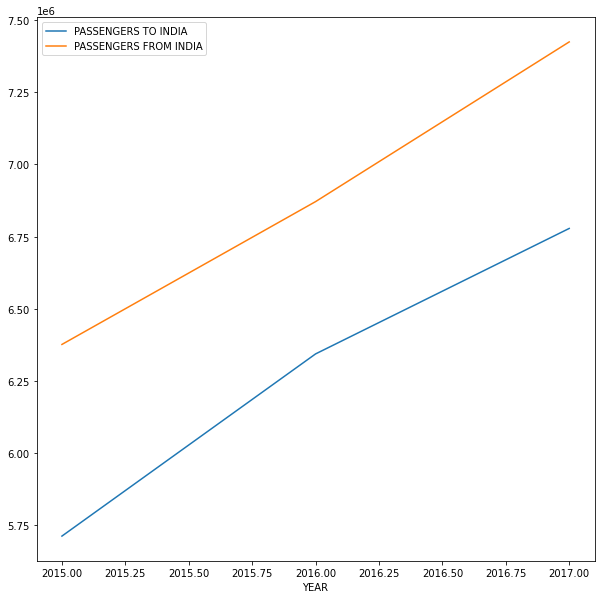

In [65]:
df_yearly = df_traffic_passengers.groupby(['YEAR', 'QUARTER'])['PASSENGERS TO INDIA', 'PASSENGERS FROM INDIA'].sum().reset_index()
df_yearly = df_yearly[df_yearly['QUARTER'] == 'Q1']
df_yearly.plot(x='YEAR', y=['PASSENGERS TO INDIA', 'PASSENGERS FROM INDIA'], kind='line', figsize=(10, 10))
df_yearly

### Visualising the Quarterly traffic of top 10 airlines
1. The top 4 remain the same during all 4 quarters.
2. Infact the ratio of traffic between the top 10 airlines is almost the same
3. Qatar Airways earns a spot in the top 10 in the last quarter.

<AxesSubplot:title={'center':'Q4 Traffic'}, xlabel='AIRLINE NAME'>

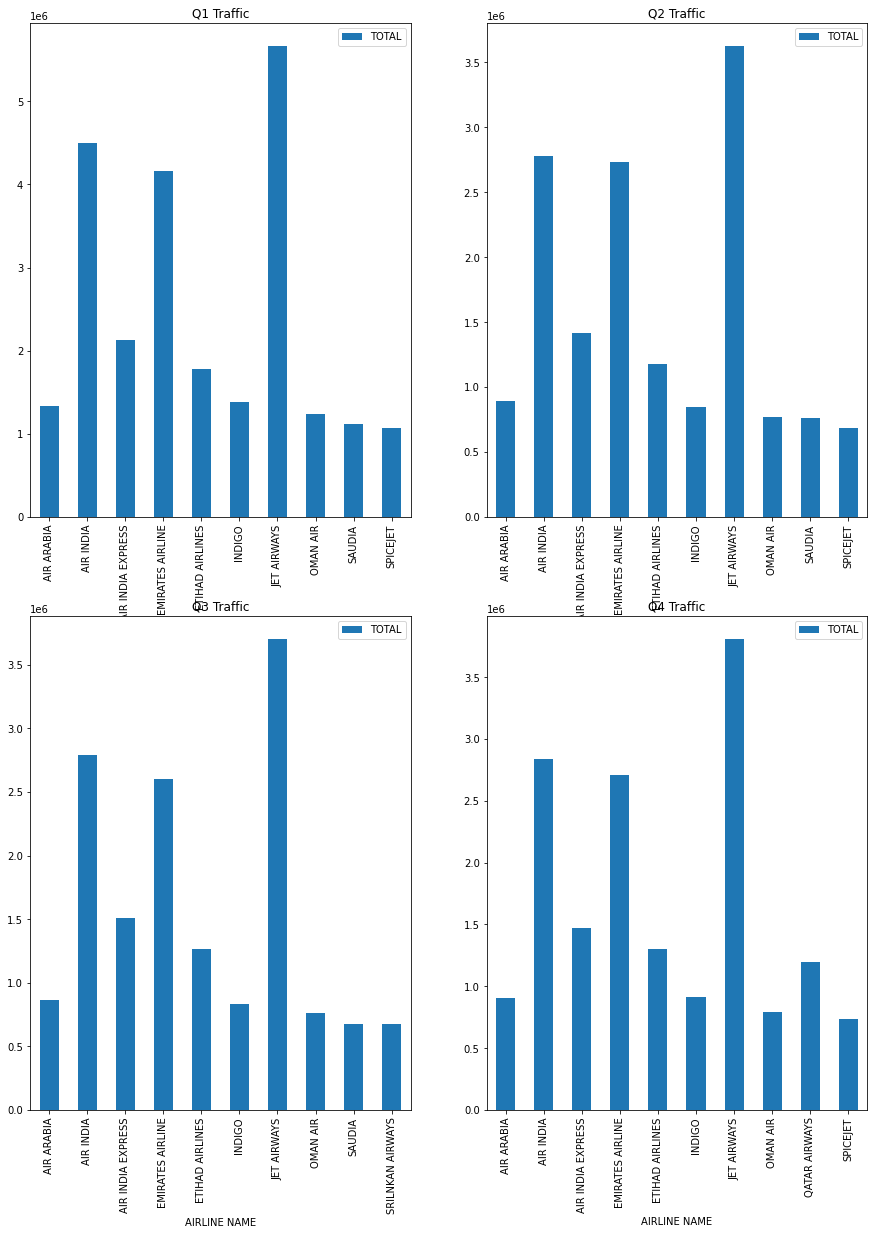

In [66]:
df_qtrly_airlines = df_traffic_passengers.groupby(['QUARTER', 'AIRLINE NAME'])['PASSENGERS TO INDIA', 'PASSENGERS FROM INDIA'].sum().reset_index()
df_qtrly_airlines['TOTAL'] = df_qtrly_airlines['PASSENGERS TO INDIA'] + df_qtrly_airlines['PASSENGERS FROM INDIA'] 
df_airlines_q1 = df_qtrly_airlines[df_qtrly_airlines['QUARTER'] == 'Q1']
df_q1_airlines_top10 = df_airlines_q1[df_airlines_q1['TOTAL'].isin(df_airlines_q1['TOTAL'].nlargest(10))]
df_airlines_q2 = df_qtrly_airlines[df_qtrly_airlines['QUARTER'] == 'Q2']
df_q2_airlines_top10 = df_airlines_q2[df_airlines_q2['TOTAL'].isin(df_airlines_q2['TOTAL'].nlargest(10))]
df_airlines_q3 = df_qtrly_airlines[df_qtrly_airlines['QUARTER'] == 'Q3']
df_q3_airlines_top10 = df_airlines_q3[df_airlines_q3['TOTAL'].isin(df_airlines_q3['TOTAL'].nlargest(10))]
df_airlines_q4 = df_qtrly_airlines[df_qtrly_airlines['QUARTER'] == 'Q4']
df_q4_airlines_top10 = df_airlines_q4[df_airlines_q4['TOTAL'].isin(df_airlines_q4['TOTAL'].nlargest(10))]
fig, axes = plt.subplots(nrows=2, ncols=2)
df_q1_airlines_top10.plot(x='AIRLINE NAME', y=['TOTAL'], kind='bar', ax=axes[0,0], figsize=(15, 20), title = 'Q1 Traffic')
df_q2_airlines_top10.plot(x='AIRLINE NAME', y=['TOTAL'], kind='bar', ax=axes[0,1], title = 'Q2 Traffic')
df_q3_airlines_top10.plot(x='AIRLINE NAME', y=['TOTAL'], kind='bar', ax=axes[1,0], title = 'Q3 Traffic')
df_q4_airlines_top10.plot(x='AIRLINE NAME', y=['TOTAL'], kind='bar', ax=axes[1,1], title = 'Q4 Traffic')

### Visualising City-wise traffic based on departure and arrivals

In [67]:
df_citywise = pd.read_csv("Citypairwise Quarterly International  Air Traffic To And From The Indian Territory.csv", error_bad_lines=False, warn_bad_lines=False)
df_citywise = df_citywise.iloc[:, :-3]
df_citywise['TOTAL TRAFFIC'] = df_citywise['PASSENGERS FROM CITY1 TO CITY2'] + df_citywise['PASSENGERS FROM CITY2 TO CITY1']
df_citywise.head(10)

YEAR QUARTER     CITY1      CITY2  PASSENGERS FROM CITY1 TO CITY2  \
0  2015      Q1  ABUDHABI  AHMEDABAD                           12764   
1  2015      Q1  ABUDHABI  BENGALURU                           27341   
2  2015      Q1  ABUDHABI    CHENNAI                           31756   
3  2015      Q1  ABUDHABI      DELHI                           66416   
4  2015      Q1  ABUDHABI        GOA                            8408   
5  2015      Q1  ABUDHABI  HYDERABAD                           37265   
6  2015      Q1  ABUDHABI     JAIPUR                            9437   
7  2015      Q1  ABUDHABI      KOCHI                           34055   
8  2015      Q1  ABUDHABI    KOLKATA                            1580   
9  2015      Q1  ABUDHABI  KOZHIKODE                           31618   

   PASSENGERS FROM CITY2 TO CITY1  TOTAL TRAFFIC  
0                           15358          28122  
1                           35988          63329  
2                           32593          64349  
3                           65956         132372  
4                           12593          21001  
5                           44645          81910  
6                           10859          20296  
7                           41972          76027  
8                            1799           3379  
9                           41032          72650

### Top 100 airport pairs with highest traffic inflow and outflow combined
Below is a snapshot of 20 of them

In [68]:
df_citywise_top100 = df_citywise[df_citywise['TOTAL TRAFFIC'].isin(df_citywise['TOTAL TRAFFIC'].nlargest(100))]
df_citywise_top100.head(20)

YEAR QUARTER      CITY1      CITY2  PASSENGERS FROM CITY1 TO CITY2  \
42   2015      Q1    BANGKOK     MUMBAI                           90096   
93   2015      Q1      DUBAI    CHENNAI                          102190   
94   2015      Q1      DUBAI      DELHI                          218394   
96   2015      Q1      DUBAI  HYDERABAD                           99989   
98   2015      Q1      DUBAI      KOCHI                           99921   
104  2015      Q1      DUBAI     MUMBAI                          260038   
141  2015      Q1  KATHMANDU      DELHI                           91764   
172  2015      Q1     LONDON      DELHI                          122349   
174  2015      Q1     LONDON     MUMBAI                           83375   
266  2015      Q1  SINGAPORE    CHENNAI                           88291   
268  2015      Q1  SINGAPORE      DELHI                           86479   
272  2015      Q1  SINGAPORE     MUMBAI                           79324   
324  2015      Q2    BANGKOK      DELHI                           85201   
328  2015      Q2    BANGKOK     MUMBAI                           92270   
341  2015      Q2    COLOMBO    CHENNAI                           88976   
378  2015      Q2      DUBAI  BENGALURU                           91594   
379  2015      Q2      DUBAI    CHENNAI                          117706   
380  2015      Q2      DUBAI      DELHI                          203463   
382  2015      Q2      DUBAI  HYDERABAD                          110757   
384  2015      Q2      DUBAI      KOCHI                          129829   

     PASSENGERS FROM CITY2 TO CITY1  TOTAL TRAFFIC  
42                            94099         184195  
93                           118103         220293  
94                           218530         436924  
96                           112952         212941  
98                           114833         214754  
104                          300106         560144  
141                           86994         178758  
172                          122506         244855  
174                           94554         177929  
266                          100794         189085  
268                           97730         184209  
272                           94249         173573  
324                           89927         175128  
328                           90960         183230  
341                           94312         183288  
378                           88399         179993  
379                          119990         237696  
380                          219902         423365  
382                          117835         228592  
384                          121029         250858

### Graphical depiction of busiest airport pairs
1. Dubai - Mumbai is arguably the busiest route with a whopping 4.5 million passengers flying both ways in 3 years
2. Take a look a the table below the graph. Flights fly in and out of Dubai to 5 Indian cities of the top 10 airport pairs.
3. A considerable number of flights fly in an out of London and (Delhi, Mumbai)

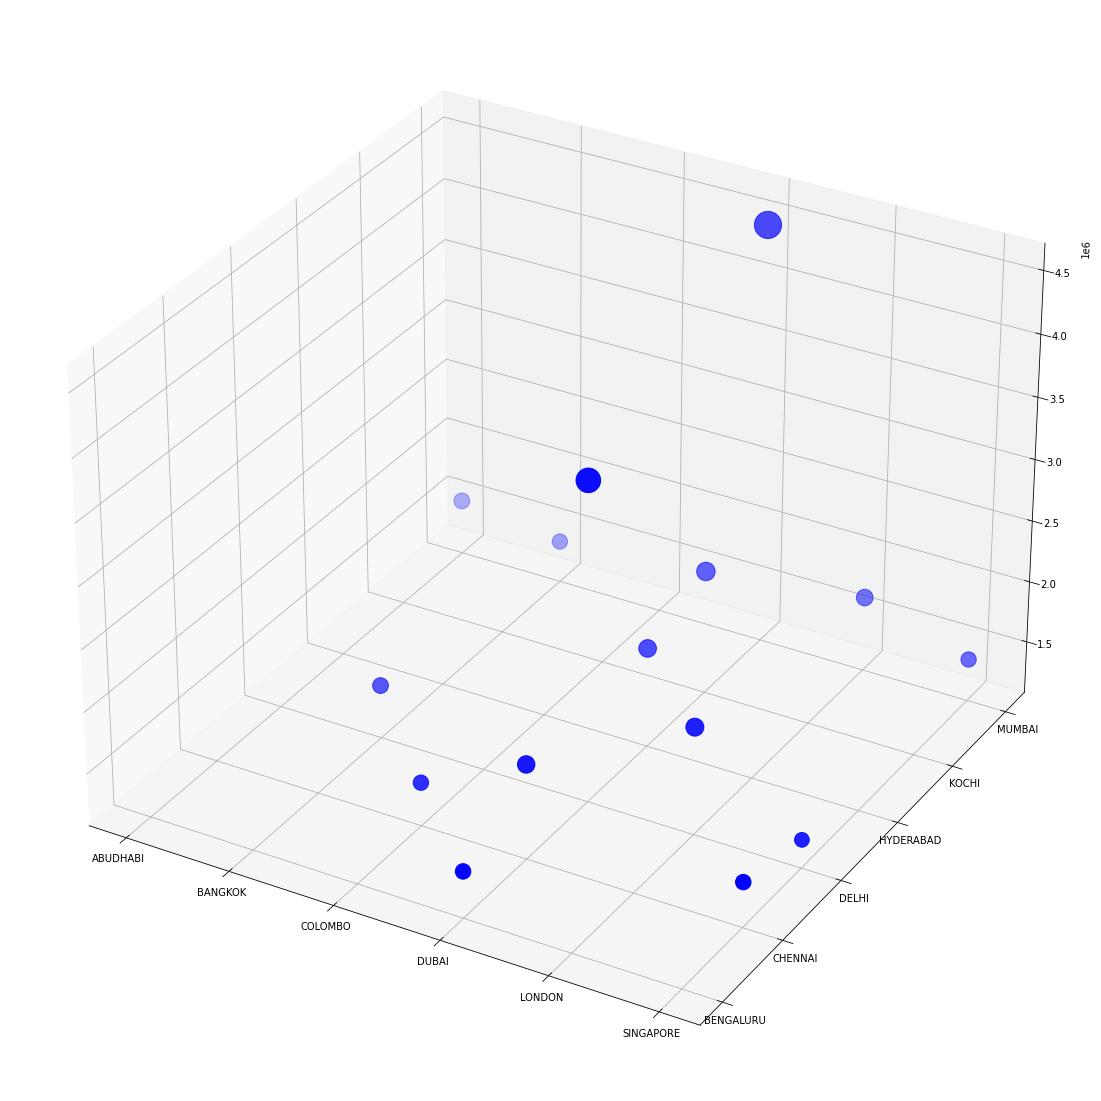

CITY1      CITY2  TOTAL TRAFFIC  TOTAL TRAFFIC SCALED
0     DUBAI     MUMBAI        4480329            739.172089
1     DUBAI      DELHI        3659375            603.729740
2     DUBAI      KOCHI        2085457            344.062145
3    LONDON      DELHI        1953307            322.259820
4     DUBAI  HYDERABAD        1886814            311.289695
5     DUBAI    CHENNAI        1846427            304.626581
6    LONDON     MUMBAI        1686086            278.173257
7  ABUDHABI     MUMBAI        1524384            251.495394
8   BANGKOK      DELHI        1511137            249.309882
9     DUBAI  BENGALURU        1455623            240.151090

In [69]:
df_citywise_cumulative_traffic = df_citywise.groupby(['CITY1', 'CITY2'])['TOTAL TRAFFIC'].sum().nlargest(15).reset_index()
highest_traffic = np.max(df_citywise['TOTAL TRAFFIC'])
uniqueCity1, city1Ints = np.unique(df_citywise_cumulative_traffic['CITY1'], return_inverse=True)
uniqueCity2, city2Ints = np.unique(df_citywise_cumulative_traffic['CITY2'], return_inverse=True)
df_citywise_cumulative_traffic['TOTAL TRAFFIC SCALED'] = (df_citywise_cumulative_traffic['TOTAL TRAFFIC'] / highest_traffic) * 100
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(city1Ints, city2Ints, df_citywise_cumulative_traffic['TOTAL TRAFFIC'], s=df_citywise_cumulative_traffic['TOTAL TRAFFIC SCALED'], c='b')
ax.set(xticks=range(len(uniqueCity1)), xticklabels=uniqueCity1,
       yticks=range(len(uniqueCity2)), yticklabels=uniqueCity2) 
plt.show()
df_citywise_cumulative_traffic.head(10)

### Visualising the Flight map of all Air Traffic flowing in and out of India

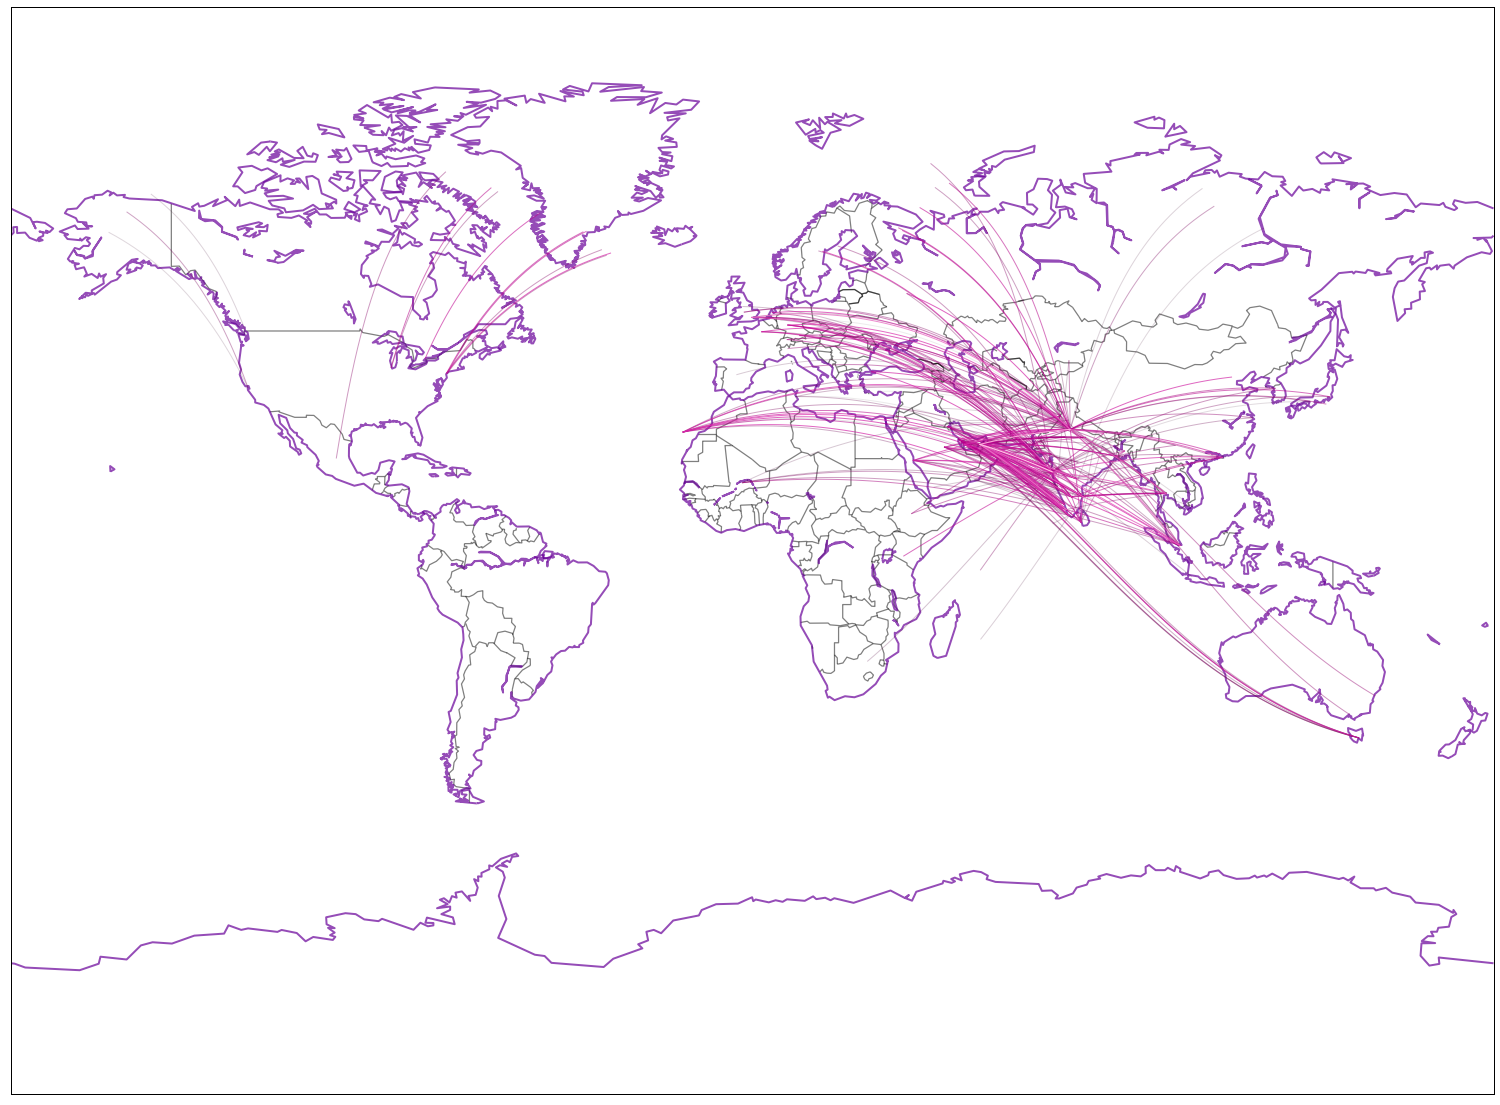

In [70]:
os.environ["PROJ_LIB"] = "C:\\Users\\Rahul\\anaconda3\\Library\\share"; #fixr
def plot_map(in_filename, color_mode='screen',
             out_filename='flights_map_mpl.png', absolute=False):
    if color_mode == 'screen':
        bg_color = (1.0, 1.0, 1, 1.0)
        coast_color = (104/255.0, 0, 153/255.0, 0.7)
        color_list = [(0.0, 0.0, 0.0, 0.0),
                      (204/255.0, 0, 153/255.0, 0.6),
                      (255/255.0, 204/255.0, 230/255.0, 1.0)]
    else:
        bg_color = (1.0, 1.0, 1.0, 0.5)
        coast_color = (10.0/255.0, 10.0/255.0, 10/255.0, 0.8)
        color_list = [(1.0, 1.0, 1.0, 0.0),
                      (255/255.0, 204/255.0, 230/255.0, 1.0),
                      (204/255.0, 0, 153/255.0, 0.6)
                      ]

    # define the expected CSV columns
    CSV_COLS = ('dep_lat', 'dep_lon', 'arr_lat', 'arr_lon',
                'nb_flights', 'CO2')
    routes = pd.read_csv(in_filename, names=CSV_COLS, na_values=['\\N'],
                         sep=',', skiprows=1)
    num_routes = len(routes.index)

    # normalize the dataset for color scale
    norm = PowerNorm(0.3, routes['nb_flights'].min(),
                     routes['nb_flights'].max())
    # norm = Normalize(routes['nb_flights'].min(), routes['nb_flights'].max())
    # create a linear color scale with enough colors
    if absolute:
        n = routes['nb_flights'].max()
    else:
        n = num_routes
    cmap = LinearSegmentedColormap.from_list('cmap_flights', color_list,
                                             N=n)
    # create the map and draw country boundaries
    plt.figure(figsize=(27, 20))
    m = Basemap(projection='mill', lon_0=0)
    
#     m.drawcountries(linewidth = 1.25, color = (123, 123, 123, 123))
#     m.drawcoastlines(color=coast_color, linewidth=1.25)
    m.fillcontinents(color=bg_color, lake_color=bg_color)
    m.drawcountries(linewidth = 1.25, color = (0, 0, 0, 0.5))
#     m.drawstates(linewidth = 0.2)
    m.drawcoastlines(linewidth=2, color=coast_color)
    m.drawmapboundary(fill_color=bg_color)

    # plot each route with its color depending on the number of flights
    j = 1
    for i, route in enumerate(routes.sort_values(by='nb_flights',
                              ascending=True).iterrows()):
        j+=1
        if j ==85 or j==217:
            continue
        route = route[1]
        if absolute:
            color = cmap(norm(int(route['nb_flights'])))
        else:
            color = cmap(i * 1.0 / num_routes)

        line, = m.drawgreatcircle(route['dep_lon'], route['dep_lat'],
                                  route['arr_lon'], route['arr_lat'],
                                  linewidth=1, color=color)
        # if the path wraps the image, basemap plots a nasty line connecting
        # the points at the opposite border of the map.
        # we thus detect path that are bigger than 30km and split them
        # by adding a NaN
        path = line.get_path()
        cut_point, = np.where(np.abs(np.diff(path.vertices[:, 0])) > 30000e3)
        if len(cut_point) > 0:
            cut_point = cut_point[0]
            vertices = np.concatenate([path.vertices[:cut_point, :],
                                      [[np.nan, np.nan]],
                                      path.vertices[cut_point+1:, :]])
            path.codes = None  # treat vertices as a serie of line segments
            path.vertices = vertices

    # save the map
    plt.show()

plot_map('flight_data_new.csv', 'screen', absolute=True)

In [71]:
#defining CSV column names
CSV_COLS = ('dep_lat', 'dep_lon', 'arr_lat', 'arr_lon', 'nb_flights', 'CO2')
routes = pd.read_csv('flight_data.csv', names=CSV_COLS,na_values=['\\N'], sep=',', skiprows=1)

In [72]:
df = pd.read_csv("countrywise_quarterly_international_air_traffic_to_and_from_the_indian_territory.csv")
df

year  quarter    country_name  passengers_to_india  \
0    2015        1     AFGHANISTAN                37194   
1    2015        1       AUSTRALIA                16676   
2    2015        1         AUSTRIA                13318   
3    2015        1         BAHRAIN               114087   
4    2015        1      BANGLADESH                76357   
..    ...      ...             ...                  ...   
494  2017        1  UNITED KINGDOM               311543   
495  2017        1   UNITED STATES               120375   
496  2017        1      UZBEKISTAN                12585   
497  2017        1         VIETNAM                    0   
498  2017        1           YEMEN                 1676   

     passengers_from_india  freight_to_india  freight_from_india  
0                    32721              96.7               676.4  
1                    19075              89.7               423.7  
2                    15529             563.8               707.0  
3                   133527             585.7              1909.5  
4                    75673             624.1              1052.9  
..                     ...               ...                 ...  
494                 337464           13194.9             19492.1  
495                 142848            1666.3              2412.2  
496                  14158             949.6              1360.3  
497                      0               0.0                 0.0  
498                   1543               0.0                14.4  

[499 rows x 7 columns]

In [73]:
df["pti_scale"] = (df["passengers_to_india"] - np.min(df["passengers_to_india"])) / (np.max(df["passengers_to_india"]) - np.min(df["passengers_to_india"]))
df

year  quarter    country_name  passengers_to_india  \
0    2015        1     AFGHANISTAN                37194   
1    2015        1       AUSTRALIA                16676   
2    2015        1         AUSTRIA                13318   
3    2015        1         BAHRAIN               114087   
4    2015        1      BANGLADESH                76357   
..    ...      ...             ...                  ...   
494  2017        1  UNITED KINGDOM               311543   
495  2017        1   UNITED STATES               120375   
496  2017        1      UZBEKISTAN                12585   
497  2017        1         VIETNAM                    0   
498  2017        1           YEMEN                 1676   

     passengers_from_india  freight_to_india  freight_from_india  pti_scale  
0                    32721              96.7               676.4   0.015598  
1                    19075              89.7               423.7   0.006993  
2                    15529             563.8               707.0   0.005585  
3                   133527             585.7              1909.5   0.047844  
4                    75673             624.1              1052.9   0.032022  
..                     ...               ...                 ...        ...  
494                 337464           13194.9             19492.1   0.130651  
495                 142848            1666.3              2412.2   0.050481  
496                  14158             949.6              1360.3   0.005278  
497                      0               0.0                 0.0   0.000000  
498                   1543               0.0                14.4   0.000703  

[499 rows x 8 columns]

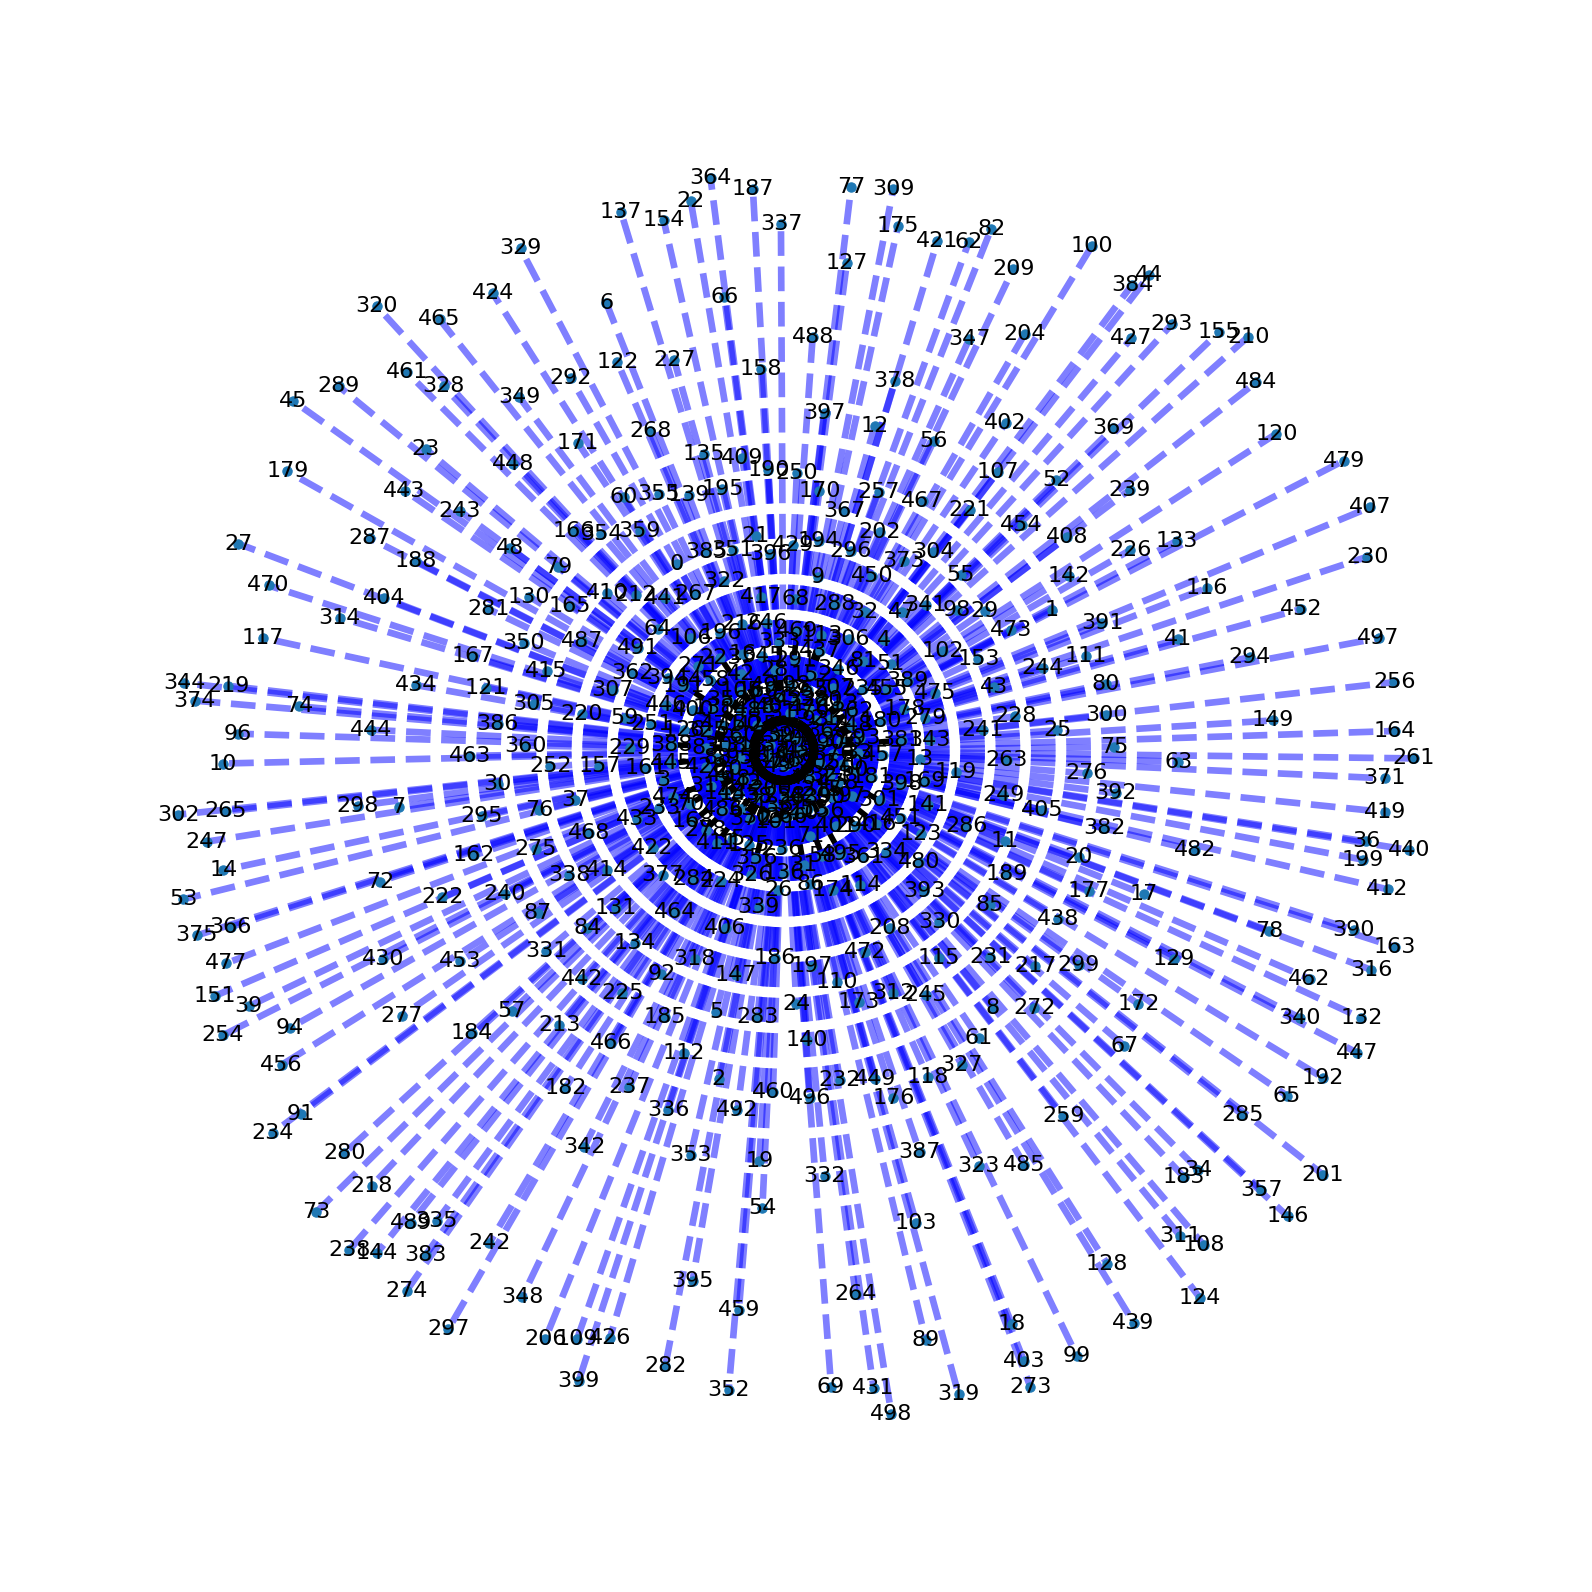

In [74]:
plt.figure(figsize=(20, 20), dpi=80)
G = nx.Graph()
for index, row in df.iterrows():
    G.add_edge("India", index, weight=row['pti_scale'])
mn = df['pti_scale'].mean()
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > mn]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= mn]
pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility
# nodes
nx.draw_networkx_nodes(G, pos, node_size=70)
# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=5)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)
# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

## Citywise Traffic Analysis


In [75]:
df1 = pd.read_csv("citypairwise_quarterly_international_air_traffic_to_and_from_the_indian_territory.csv")
df1["pfc1c2_scale"] = (df1["passengers_from_city1_to_city2"] - np.min(df1["passengers_from_city1_to_city2"])) / (np.max(df1["passengers_from_city1_to_city2"]) - np.min(df1["passengers_from_city1_to_city2"]))
df1["pfc2c1_scale"] = (df1["passengers_from_city2_to_city1"] - np.min(df1["passengers_from_city2_to_city1"])) / (np.max(df1["passengers_from_city2_to_city1"]) - np.min(df1["passengers_from_city2_to_city1"]))
pt_mean = df1["pfc1c2_scale"].mean()
city1_2 = df1["city2"].unique()
city2_1 = df1["city1"].unique()
print(city1_2)
print(city2_1)

['AHMEDABAD' 'BENGALURU' 'CHENNAI' 'DELHI' 'GOA' 'HYDERABAD' 'JAIPUR'
 'KOCHI' 'KOLKATA' 'KOZHIKODE' 'LUCKNOW' 'MANGALORE' 'MUMBAI' 'PUNE'
 'TRIVANDRUM' 'AMRITSAR' 'GAYA' 'VARANASI' 'MADURAI' 'TIRUCHIRAPALLY'
 'VISAKHAPATNAM' 'COIMBATORE' 'NAGPUR' 'CHANDIGARH']
['ABUDHABI' 'ADDIS ABABA' 'ADEN' 'AL AIN' 'ALMATY' 'AMSTERDAM' 'ASHGABAT'
 'BAHRAIN' 'BANGKOK' 'BIRMINGHAM' 'BISHKEK' 'BRUSELLS' 'CAIRO' 'CHICAGO'
 'CHITTAGONG' 'COLOGNE' 'COLOMBO' 'DAMMAM' 'DHAKA' 'DOHA' 'DUBAI'
 'DUSHANBE' 'FRANKFURT' 'GUANGZHOU' 'HAA DHAALU ATOLL' 'HELNSKI'
 'HO CHI MINH CITY' 'HONG KONG' 'ISTANBUL' 'JEDDAH' 'JOHANNESBERG' 'KABUL'
 'KARACHI' 'KATHMANDU' 'KUALALUMPUR' 'KUNMING' 'KUWAIT' 'LAHORE' 'LEIPZIG'
 'LONDON' 'LUXEMBOURG' 'MALE' 'MALPENSA' 'MANDALAY' 'MARUITIUS' 'MEDINA'
 'MELBOURNE' 'MOSCOW' 'MUENCHEN' 'MUSCAT' 'NAIROBI' 'NARITA' 'NAVOI'
 'NEW YORK' 'NEWARK' 'OSAKA' 'PARIS' 'PARO' 'PEKING' 'RANGOON' 'RIYADH'
 'ROME' 'SALALAH' 'SANAA' 'SEOUL' 'SEYCHELLES' 'SHANGHAI' 'SHARJAH'
 'SHENZHEN' 'SINGAPORE' 'SYD

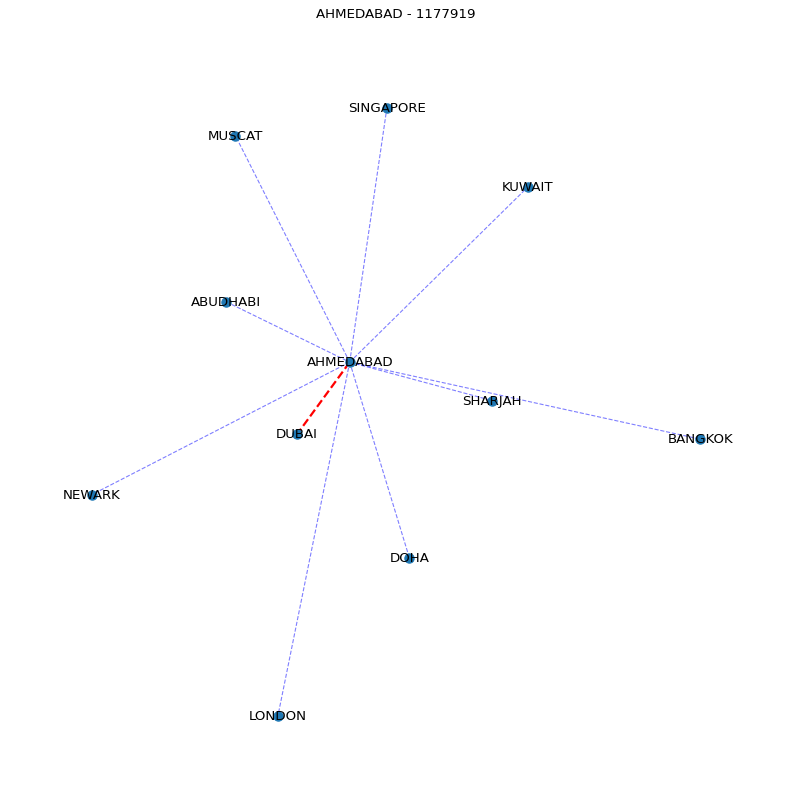

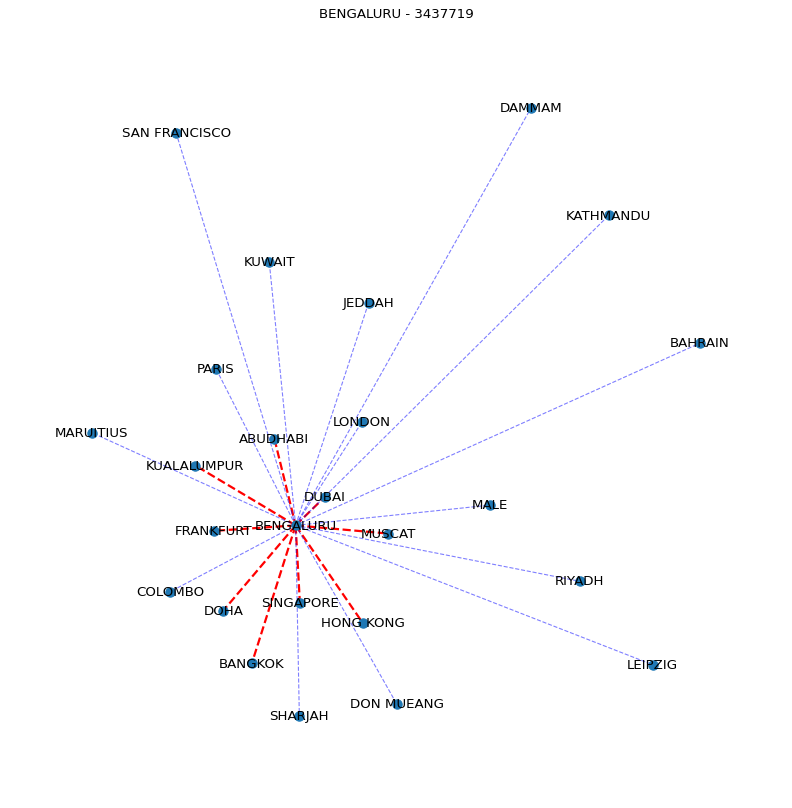

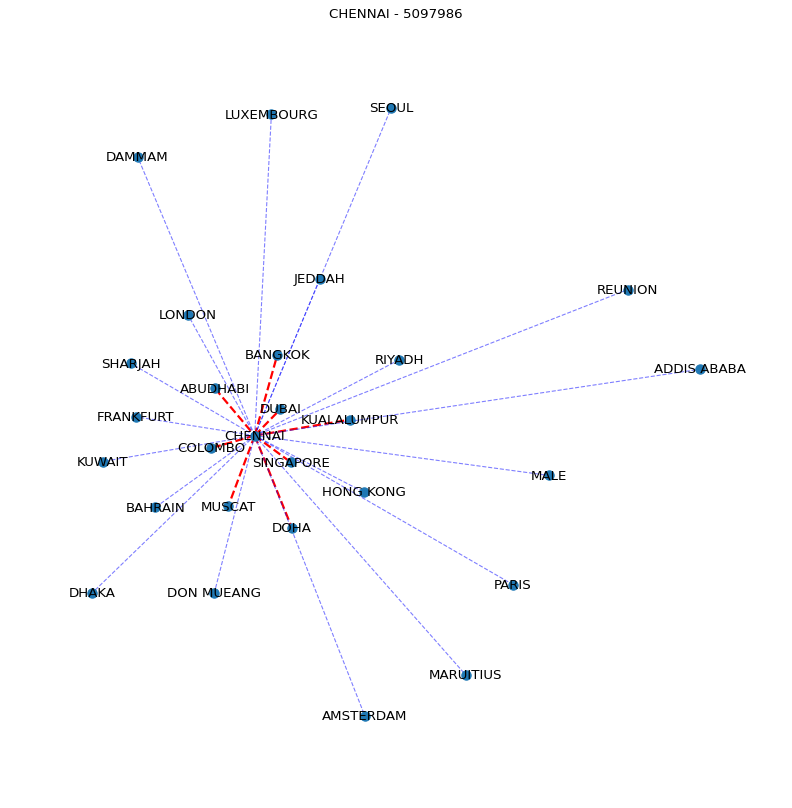

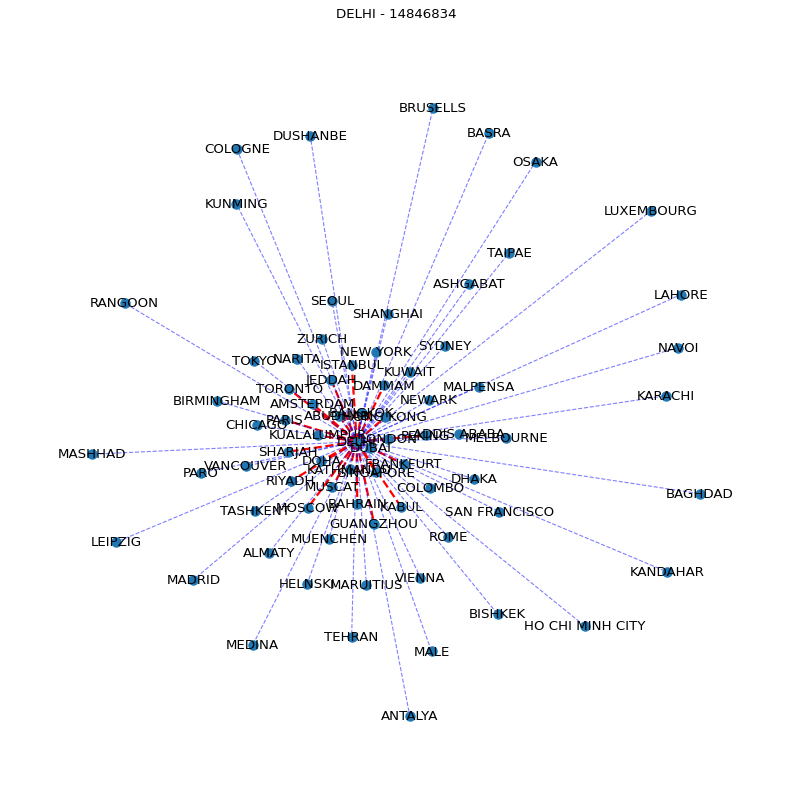

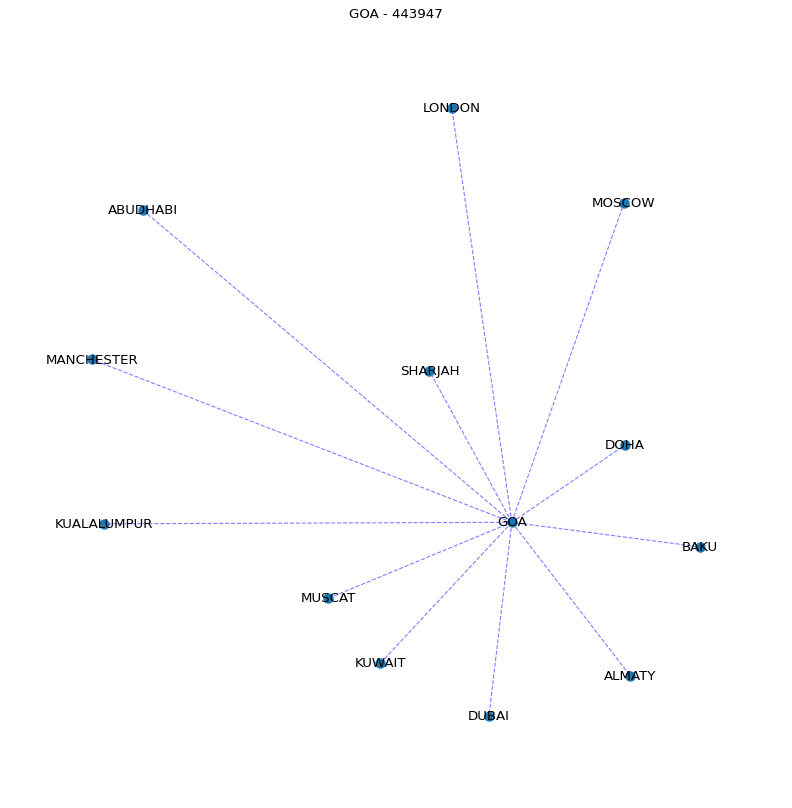

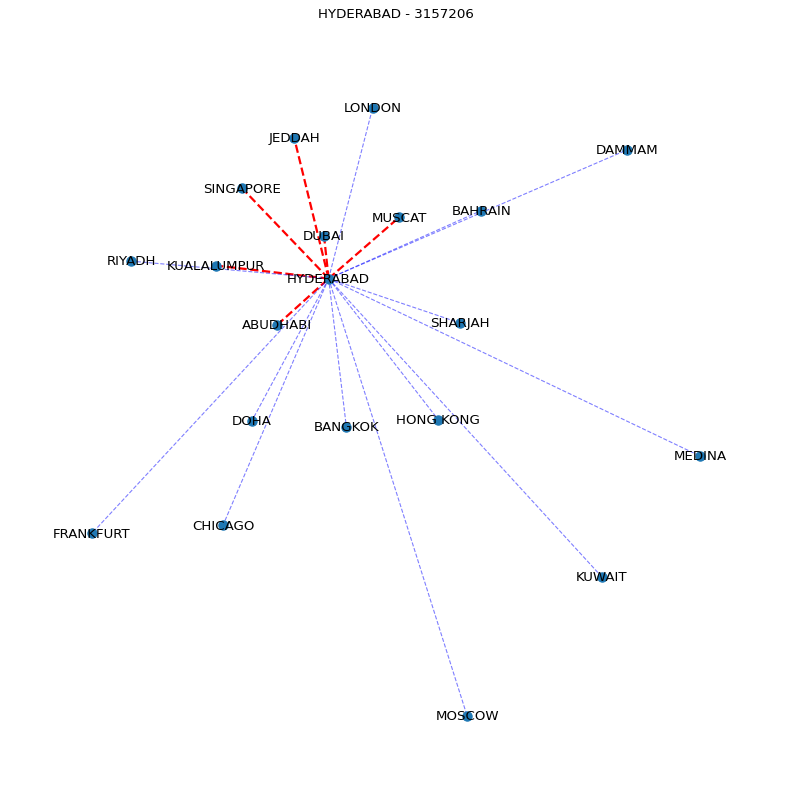

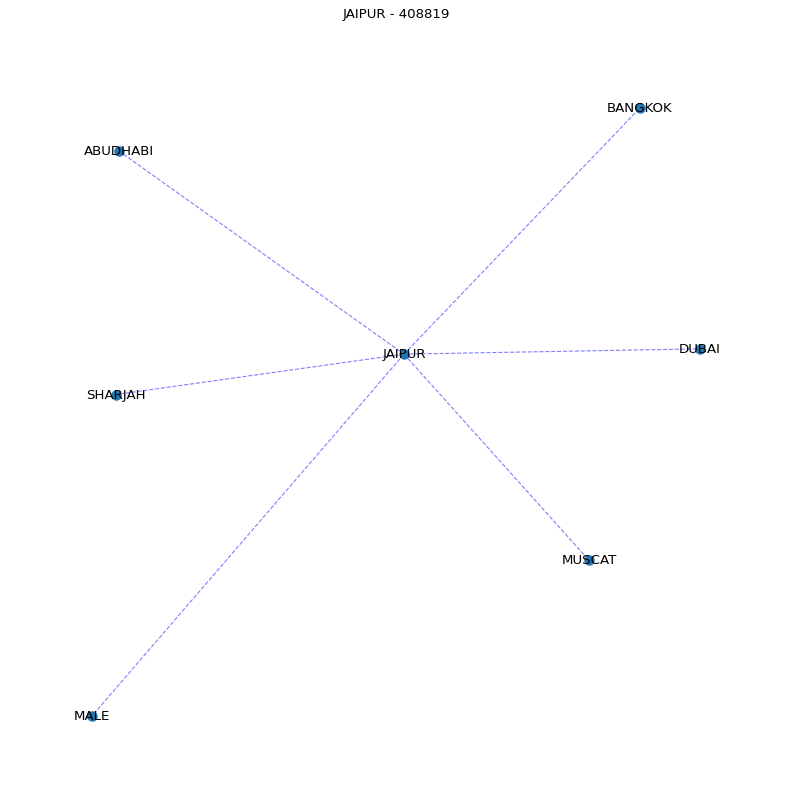

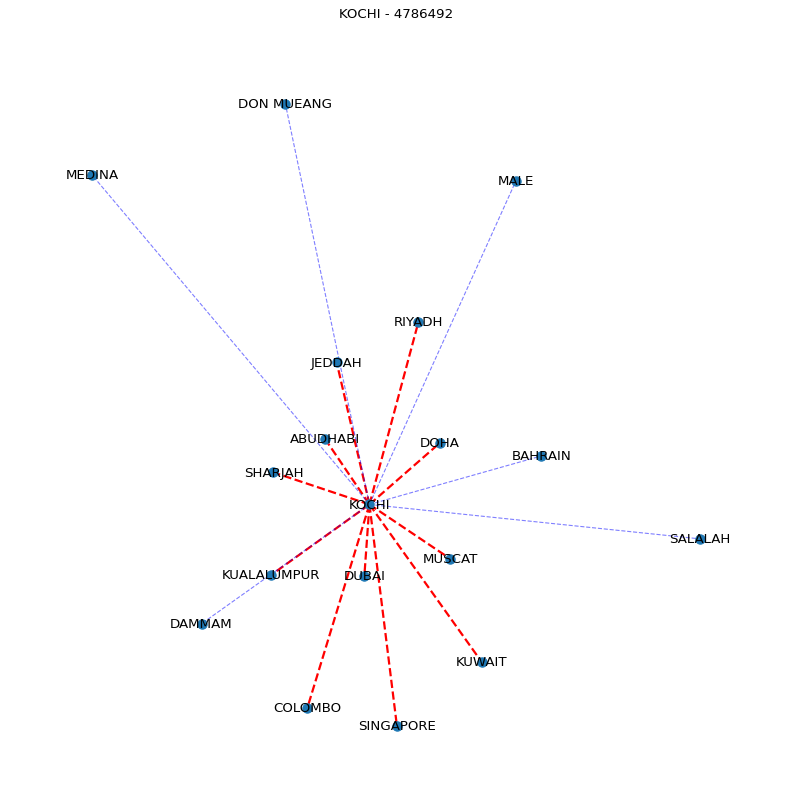

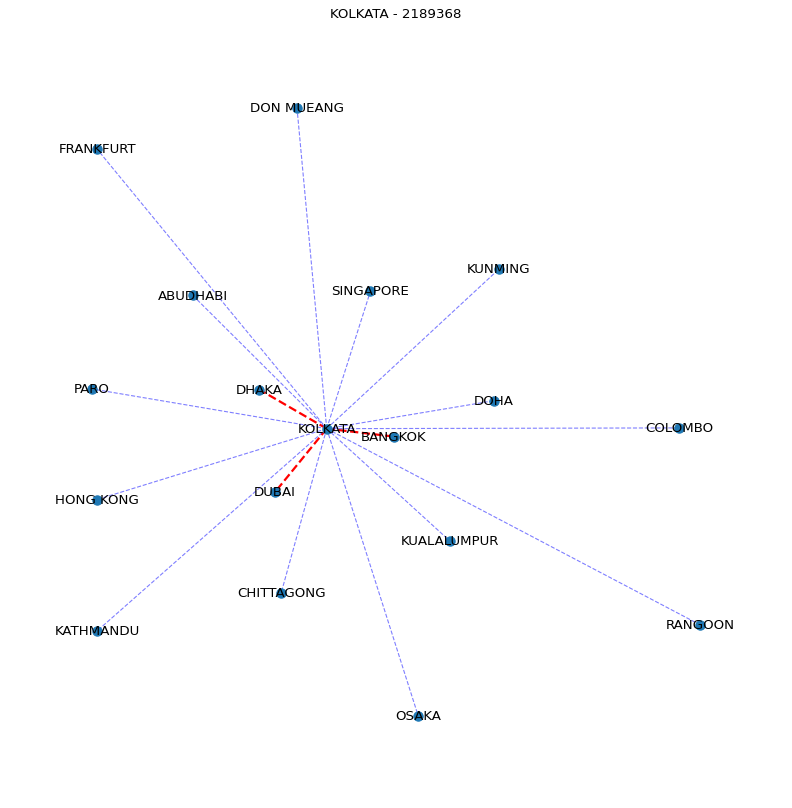

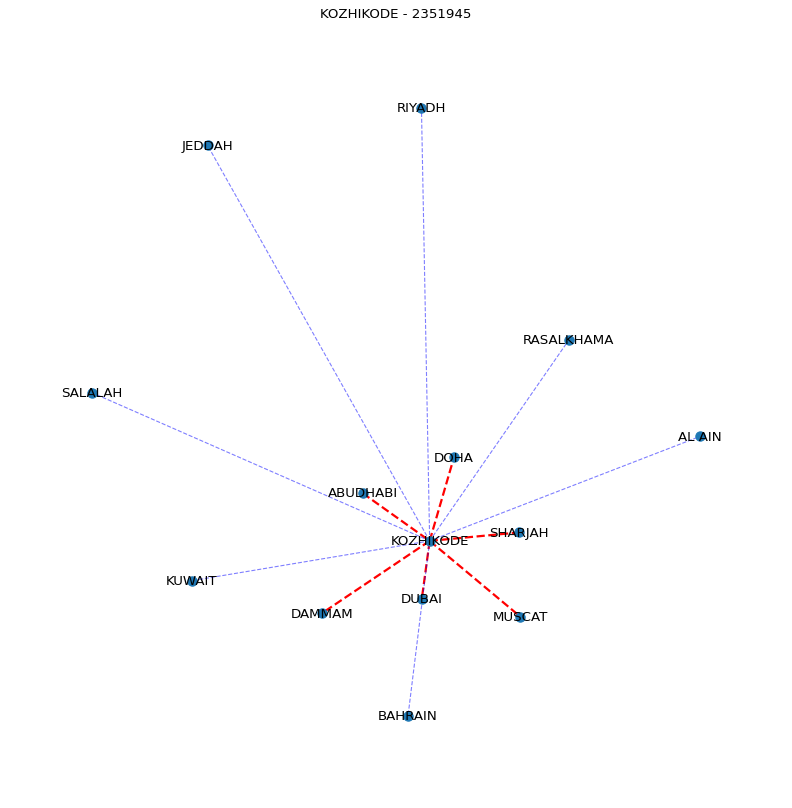

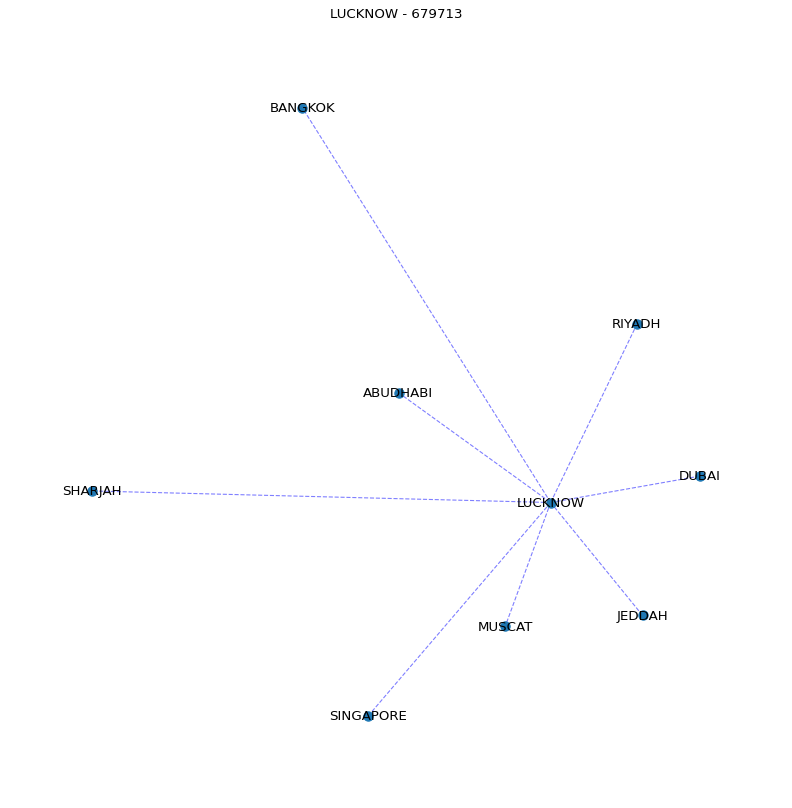

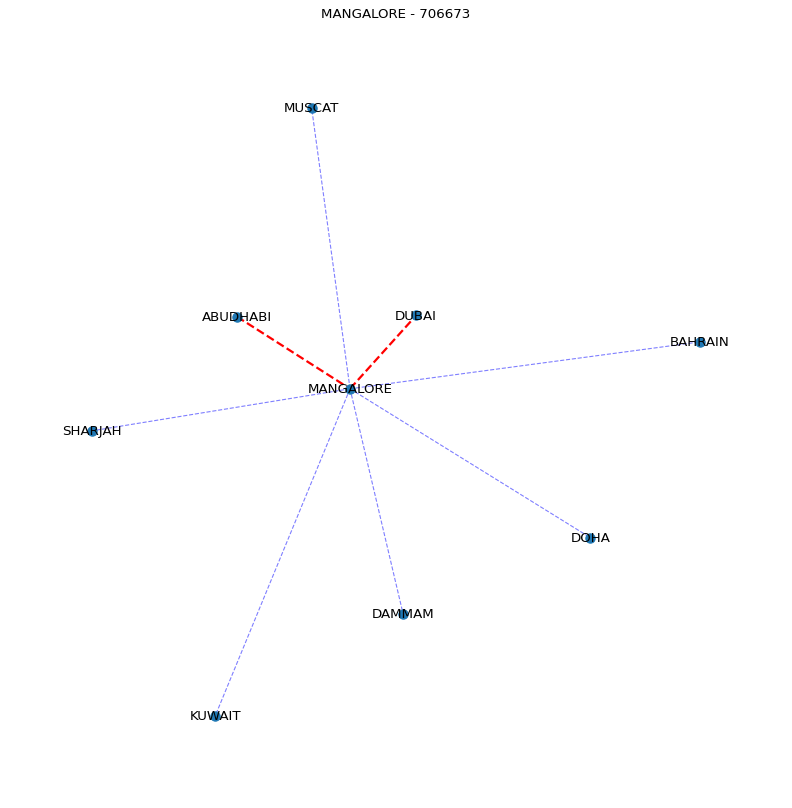

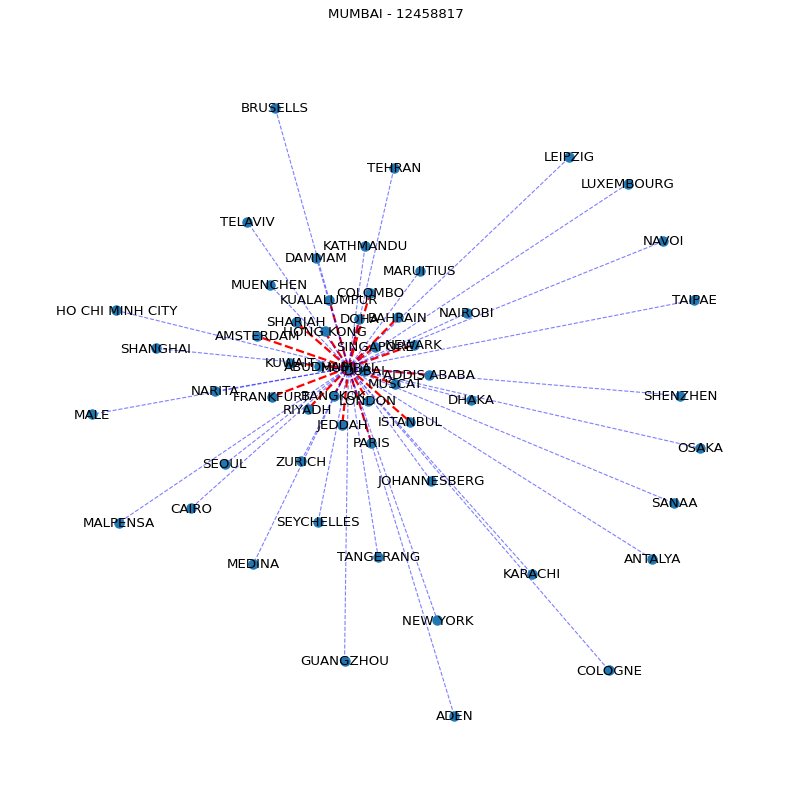

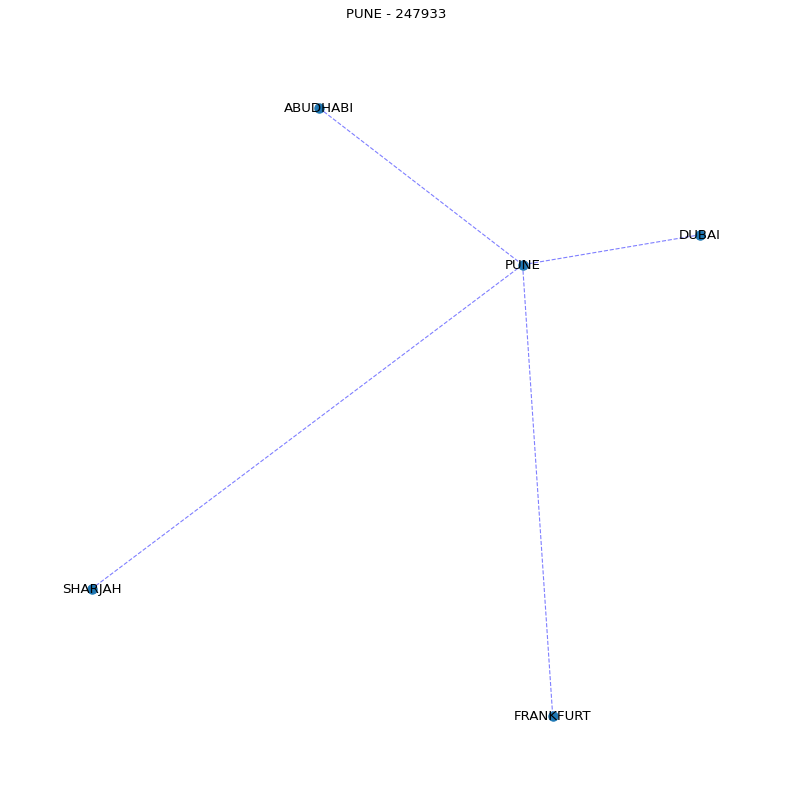

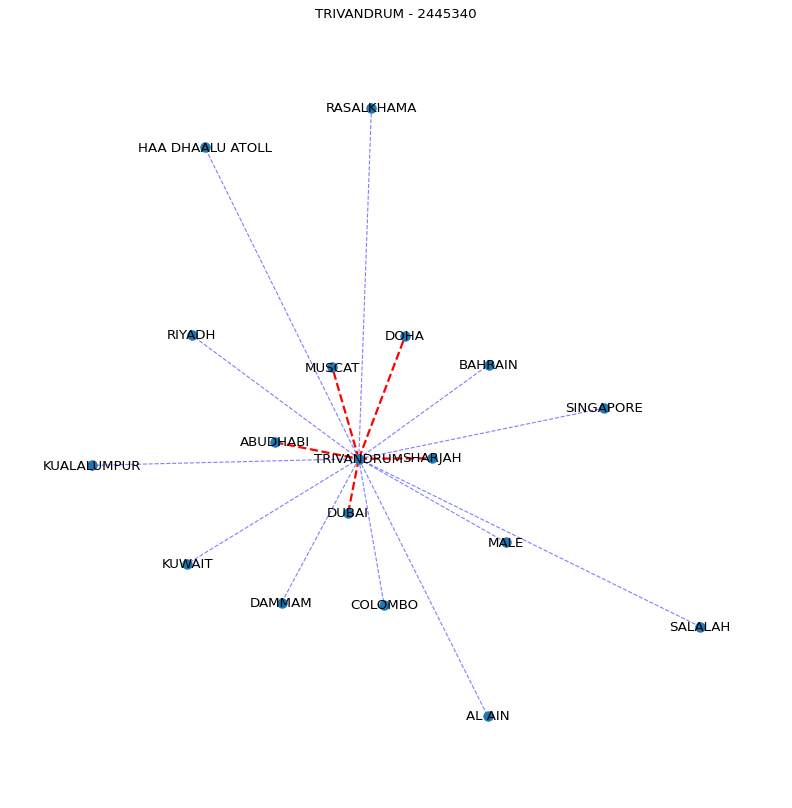

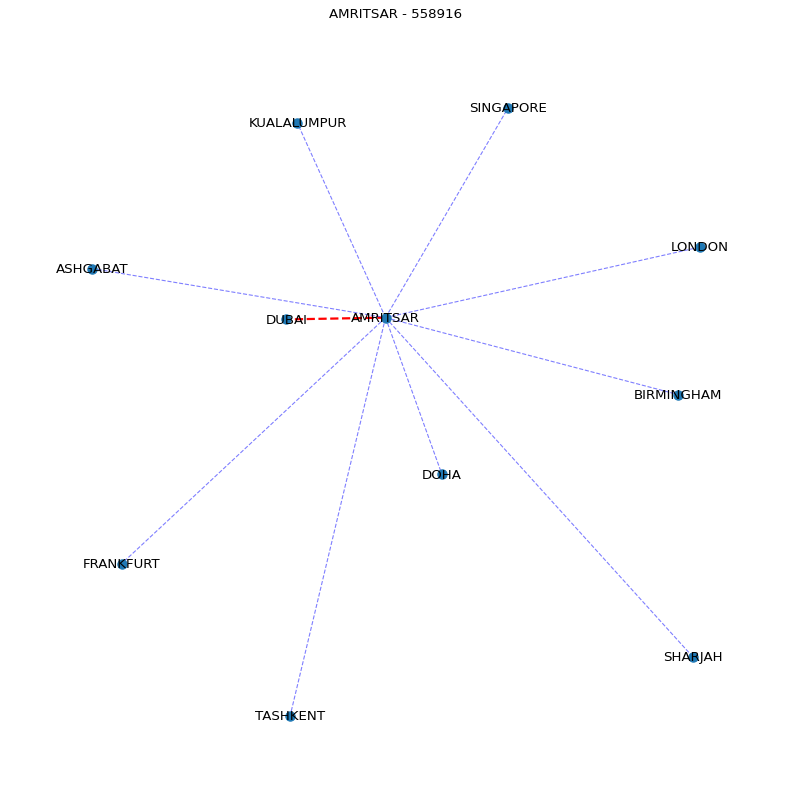

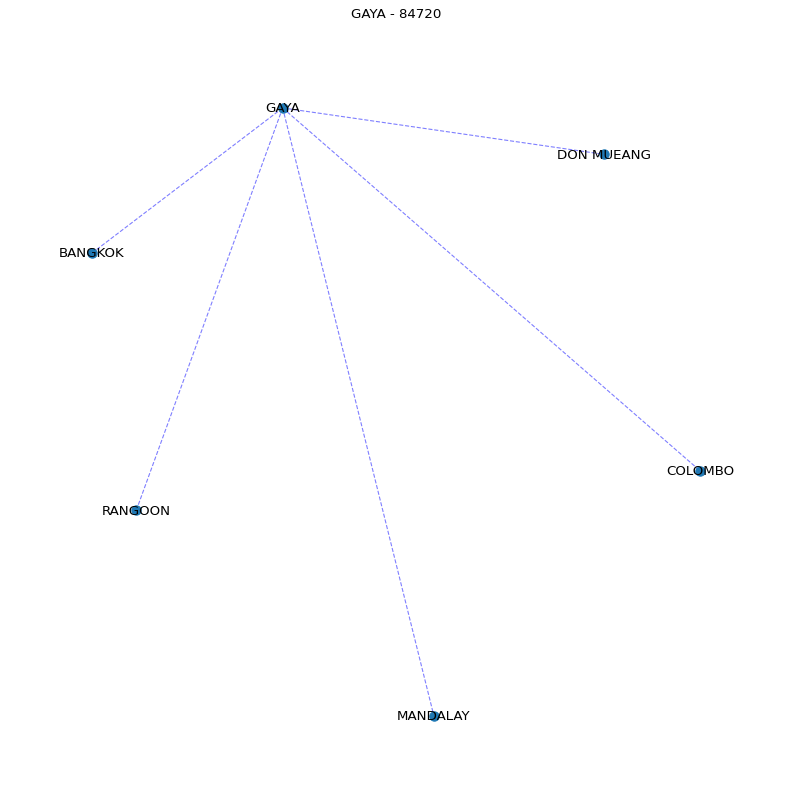

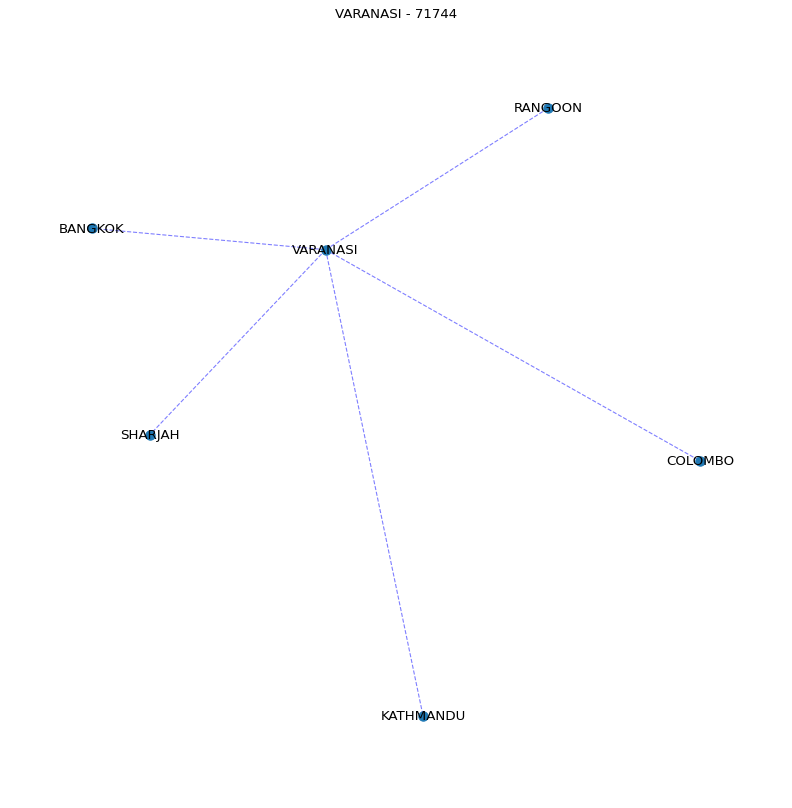

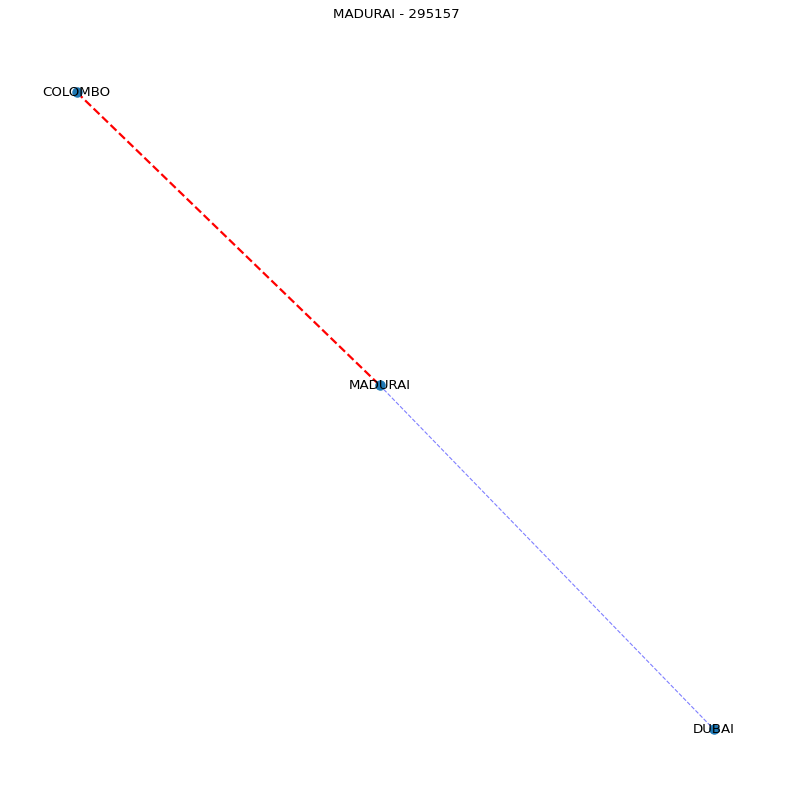

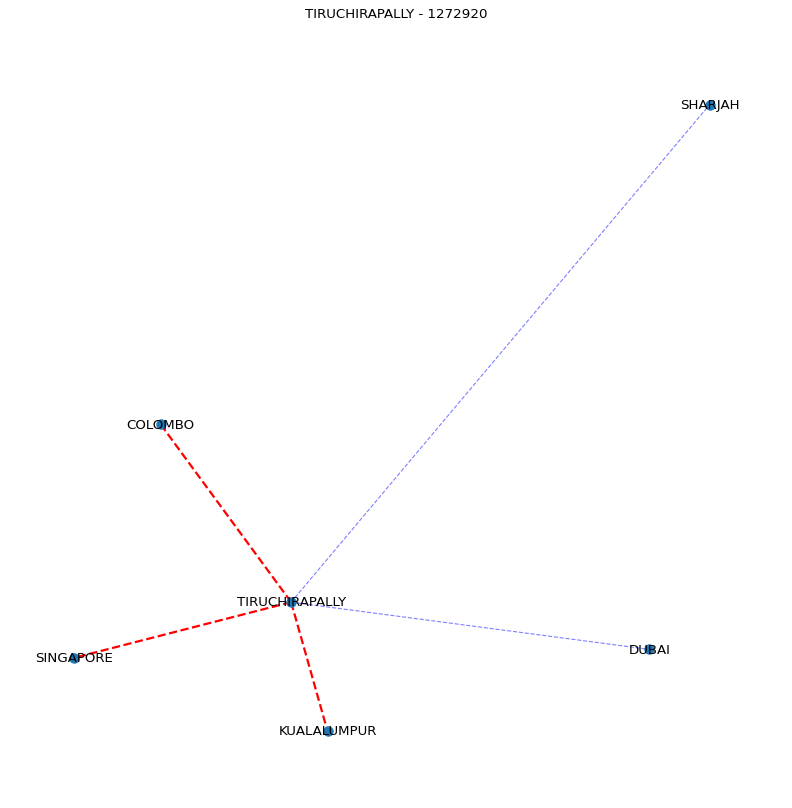

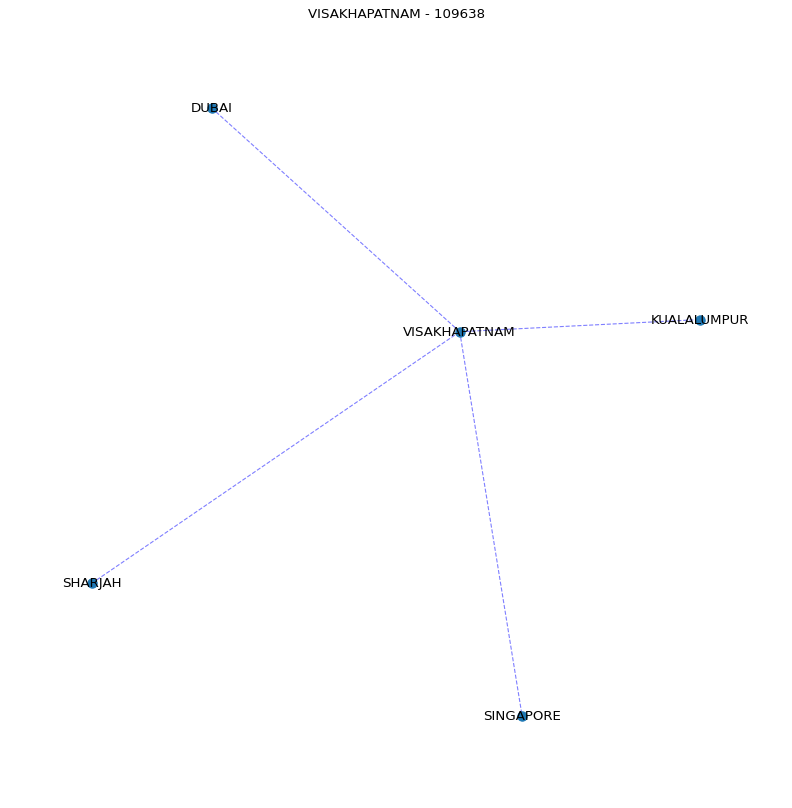

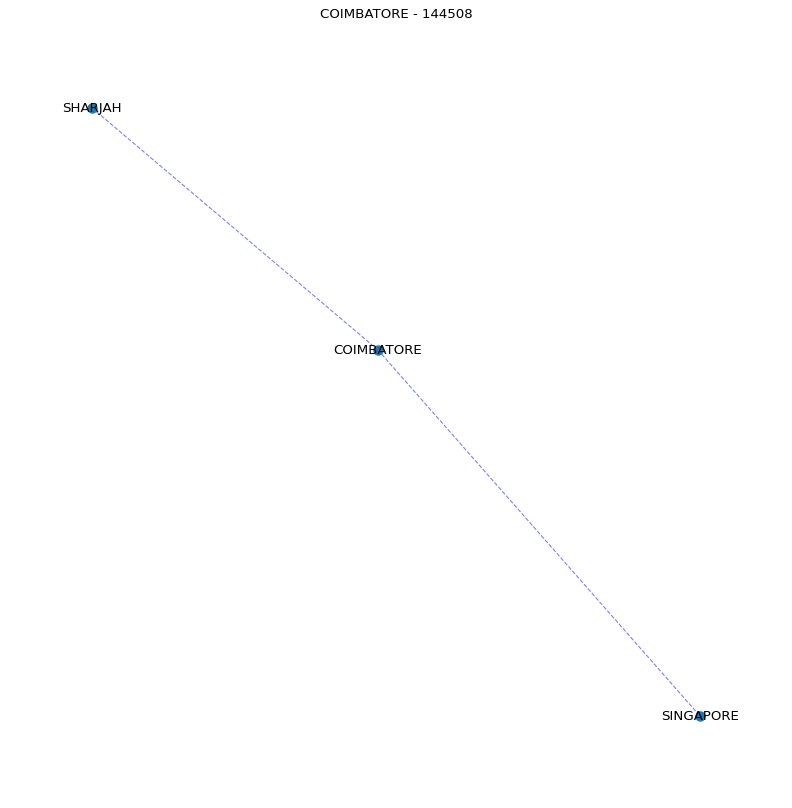

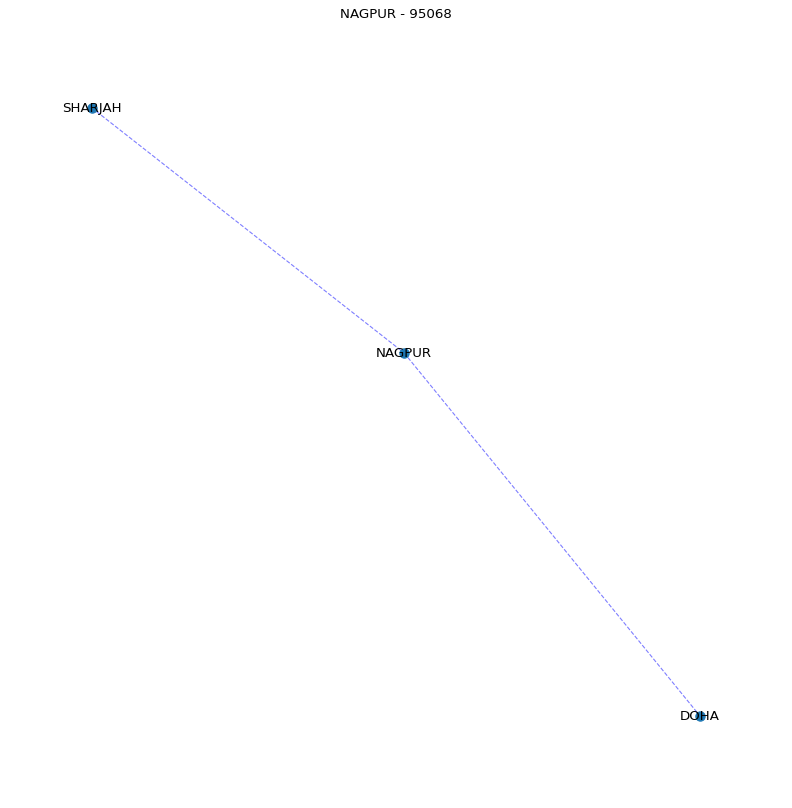

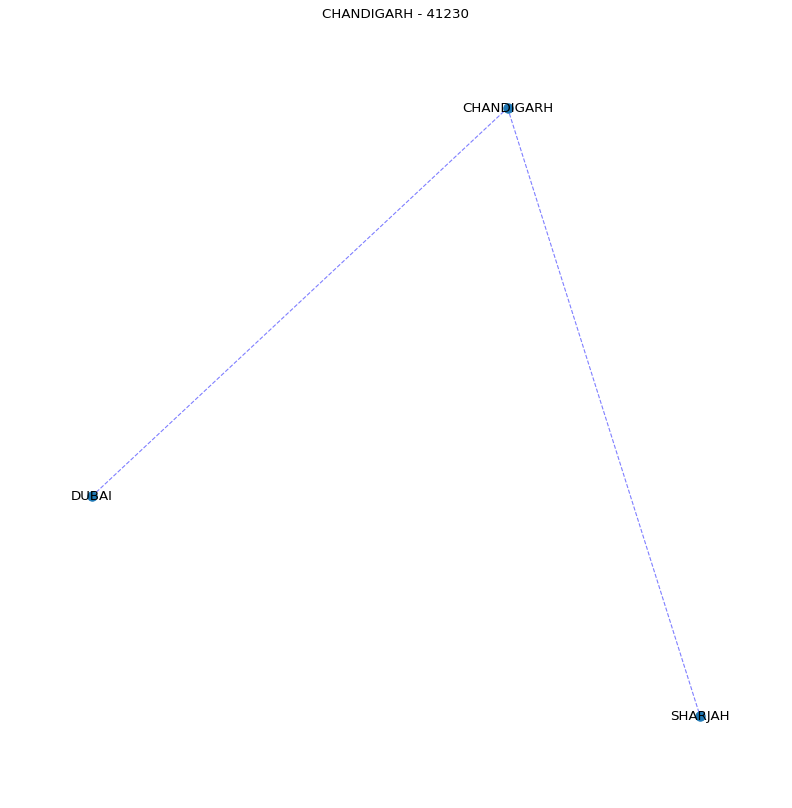

In [76]:
for city in city1_2:
    plt.figure(figsize=(10, 10), dpi=80)
    G = nx.Graph()
    tot = 0
    for index, row in df1.iterrows():
        if row["city2"]==city:
            G.add_edge(row["city1"], row["city2"], weight=row['pfc1c2_scale'])
            tot+=row["passengers_from_city1_to_city2"]

    elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > pt_mean]
    esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= pt_mean]

    pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=70)

    # edges
    nx.draw_networkx_edges(G, pos, edgelist=elarge, width=2, edge_color="r", style="dashed")
    nx.draw_networkx_edges(
        G, pos, edgelist=esmall, width=1, alpha=0.5, edge_color="b", style="dashed"
    )

    # labels
    nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")

    ax = plt.gca()
    ax.margins(0.08)
    plt.axis("off")
    plt.tight_layout()
    plt.title(city + " - " + str(tot))
    plt.show()

In [77]:
G = nx.Graph()
for index, row in df.iterrows():
    G.add_edge("India", row["country_name"], weight=row['pti_scale'])
nx.degree_centrality(G)

{'India': 1.0,
 'AFGHANISTAN': 0.01694915254237288,
 'AUSTRALIA': 0.01694915254237288,
 'AUSTRIA': 0.01694915254237288,
 'BAHRAIN': 0.01694915254237288,
 'BANGLADESH': 0.01694915254237288,
 'BELGIUM': 0.01694915254237288,
 'BHUTAN': 0.01694915254237288,
 'BURMA': 0.01694915254237288,
 'CANADA': 0.01694915254237288,
 'CHINA': 0.01694915254237288,
 'EGYPT': 0.01694915254237288,
 'ETHIOPIA': 0.01694915254237288,
 'FINLAND': 0.01694915254237288,
 'FRANCE': 0.01694915254237288,
 'GEORGIA': 0.01694915254237288,
 'GERMANY': 0.01694915254237288,
 'HONG KONG': 0.01694915254237288,
 'IRAN': 0.01694915254237288,
 'IRAQ': 0.01694915254237288,
 'ISRAEL': 0.01694915254237288,
 'ITALY': 0.01694915254237288,
 'JAPAN': 0.01694915254237288,
 'JORDAN': 0.01694915254237288,
 'KAZAKHSTAN': 0.01694915254237288,
 'KENYA': 0.01694915254237288,
 'KOREA': 0.01694915254237288,
 'KUWAIT': 0.01694915254237288,
 'KYRGYZSTAN': 0.01694915254237288,
 'MALAYSIA': 0.01694915254237288,
 'MALDIVES': 0.01694915254237288,
 

In [78]:
G1 = nx.Graph()
G2 = nx.Graph()
for index, row in df1.iterrows():
    G1.add_edge(row["city1"], row["city2"], weight=row['pfc1c2_scale'])
    G2.add_edge(row["city2"], row["city1"], weight=row['pfc2c1_scale'])
# print(nx.degree_centrality(G1))
# print(nx.degree_centrality(G2))
for city in city2_1:
    print(city, nx.degree_centrality(G2)[city])
print()
for city in city1_2:
    print(city, nx.degree_centrality(G2)[city])

ABUDHABI 0.12931034482758622
ADDIS ABABA 0.02586206896551724
ADEN 0.008620689655172414
AL AIN 0.017241379310344827
ALMATY 0.017241379310344827
AMSTERDAM 0.02586206896551724
ASHGABAT 0.017241379310344827
BAHRAIN 0.07758620689655173
BANGKOK 0.09482758620689655
BIRMINGHAM 0.017241379310344827
BISHKEK 0.008620689655172414
BRUSELLS 0.017241379310344827
CAIRO 0.008620689655172414
CHICAGO 0.017241379310344827
CHITTAGONG 0.008620689655172414
COLOGNE 0.017241379310344827
COLOMBO 0.09482758620689655
DAMMAM 0.07758620689655173
DHAKA 0.034482758620689655
DOHA 0.12068965517241378
DUBAI 0.1724137931034483
DUSHANBE 0.008620689655172414
FRANKFURT 0.06896551724137931
GUANGZHOU 0.017241379310344827
HAA DHAALU ATOLL 0.008620689655172414
HELNSKI 0.008620689655172414
HO CHI MINH CITY 0.017241379310344827
HONG KONG 0.05172413793103448
ISTANBUL 0.017241379310344827
JEDDAH 0.06896551724137931
JOHANNESBERG 0.008620689655172414
KABUL 0.008620689655172414
KARACHI 0.017241379310344827
KATHMANDU 0.0431034482758620

In [79]:
df1

year  quarter     city1      city2  passengers_from_city1_to_city2  \
0     2015        1  ABUDHABI  AHMEDABAD                           12764   
1     2015        1  ABUDHABI  BENGALURU                           27341   
2     2015        1  ABUDHABI    CHENNAI                           31756   
3     2015        1  ABUDHABI      DELHI                           66416   
4     2015        1  ABUDHABI        GOA                            8408   
...    ...      ...       ...        ...                             ...   
2836  2017        1     TOKYO      DELHI                           10276   
2837  2017        1   TORONTO      DELHI                           21579   
2838  2017        1    VIENNA      DELHI                            6363   
2839  2017        1    ZURICH      DELHI                           14578   
2840  2017        1    ZURICH     MUMBAI                           15487   

      passengers_from_city2_to_city1  freight_from_city1_to_city2  \
0                              15358                         15.5   
1                              35988                        372.5   
2                              32593                         65.8   
3                              65956                       1542.3   
4                              12593                         18.8   
...                              ...                          ...   
2836                           13292                       1259.2   
2837                           29078                        187.3   
2838                            8275                        125.8   
2839                           20335                       1083.9   
2840                           20426                       1205.4   

      freight_from_city2_to_city1  pfc1c2_scale  pfc2c1_scale  
0                            64.9      0.041931      0.047518  
1                           442.1      0.089818      0.111347  
2                            97.0      0.104322      0.100843  
3                          1683.5      0.218183      0.204068  
4                             0.0      0.027621      0.038963  
...                           ...           ...           ...  
2836                        723.8      0.033758      0.041125  
2837                        358.8      0.070889      0.089967  
2838                         87.5      0.020903      0.025603  
2839                       1429.7      0.047890      0.062917  
2840                       1482.5      0.050876      0.063198  

[2841 rows x 10 columns]

In [80]:
G = nx.Graph()
for index, row in df1.iterrows():
    G.add_edge(row["city1"], row["city2"])

In [81]:
MDG = nx.MultiDiGraph()
#DG2 = nx.DiGraph()
for index, row in df1.iterrows():
    MDG.add_edge(row["city1"], row["city2"], weight=row['pfc1c2_scale'])
    MDG.add_edge(row["city2"], row["city1"], weight=row['pfc2c1_scale'])


In [82]:
DG12 = nx.DiGraph()
DG21 = nx.DiGraph()
#DG2 = nx.DiGraph()
for index, row in df1.iterrows():
    DG12.add_edge(row["city1"], row["city2"], weight=row['pfc1c2_scale'])
    DG21.add_edge(row["city2"], row["city1"], weight=row['pfc2c1_scale'])

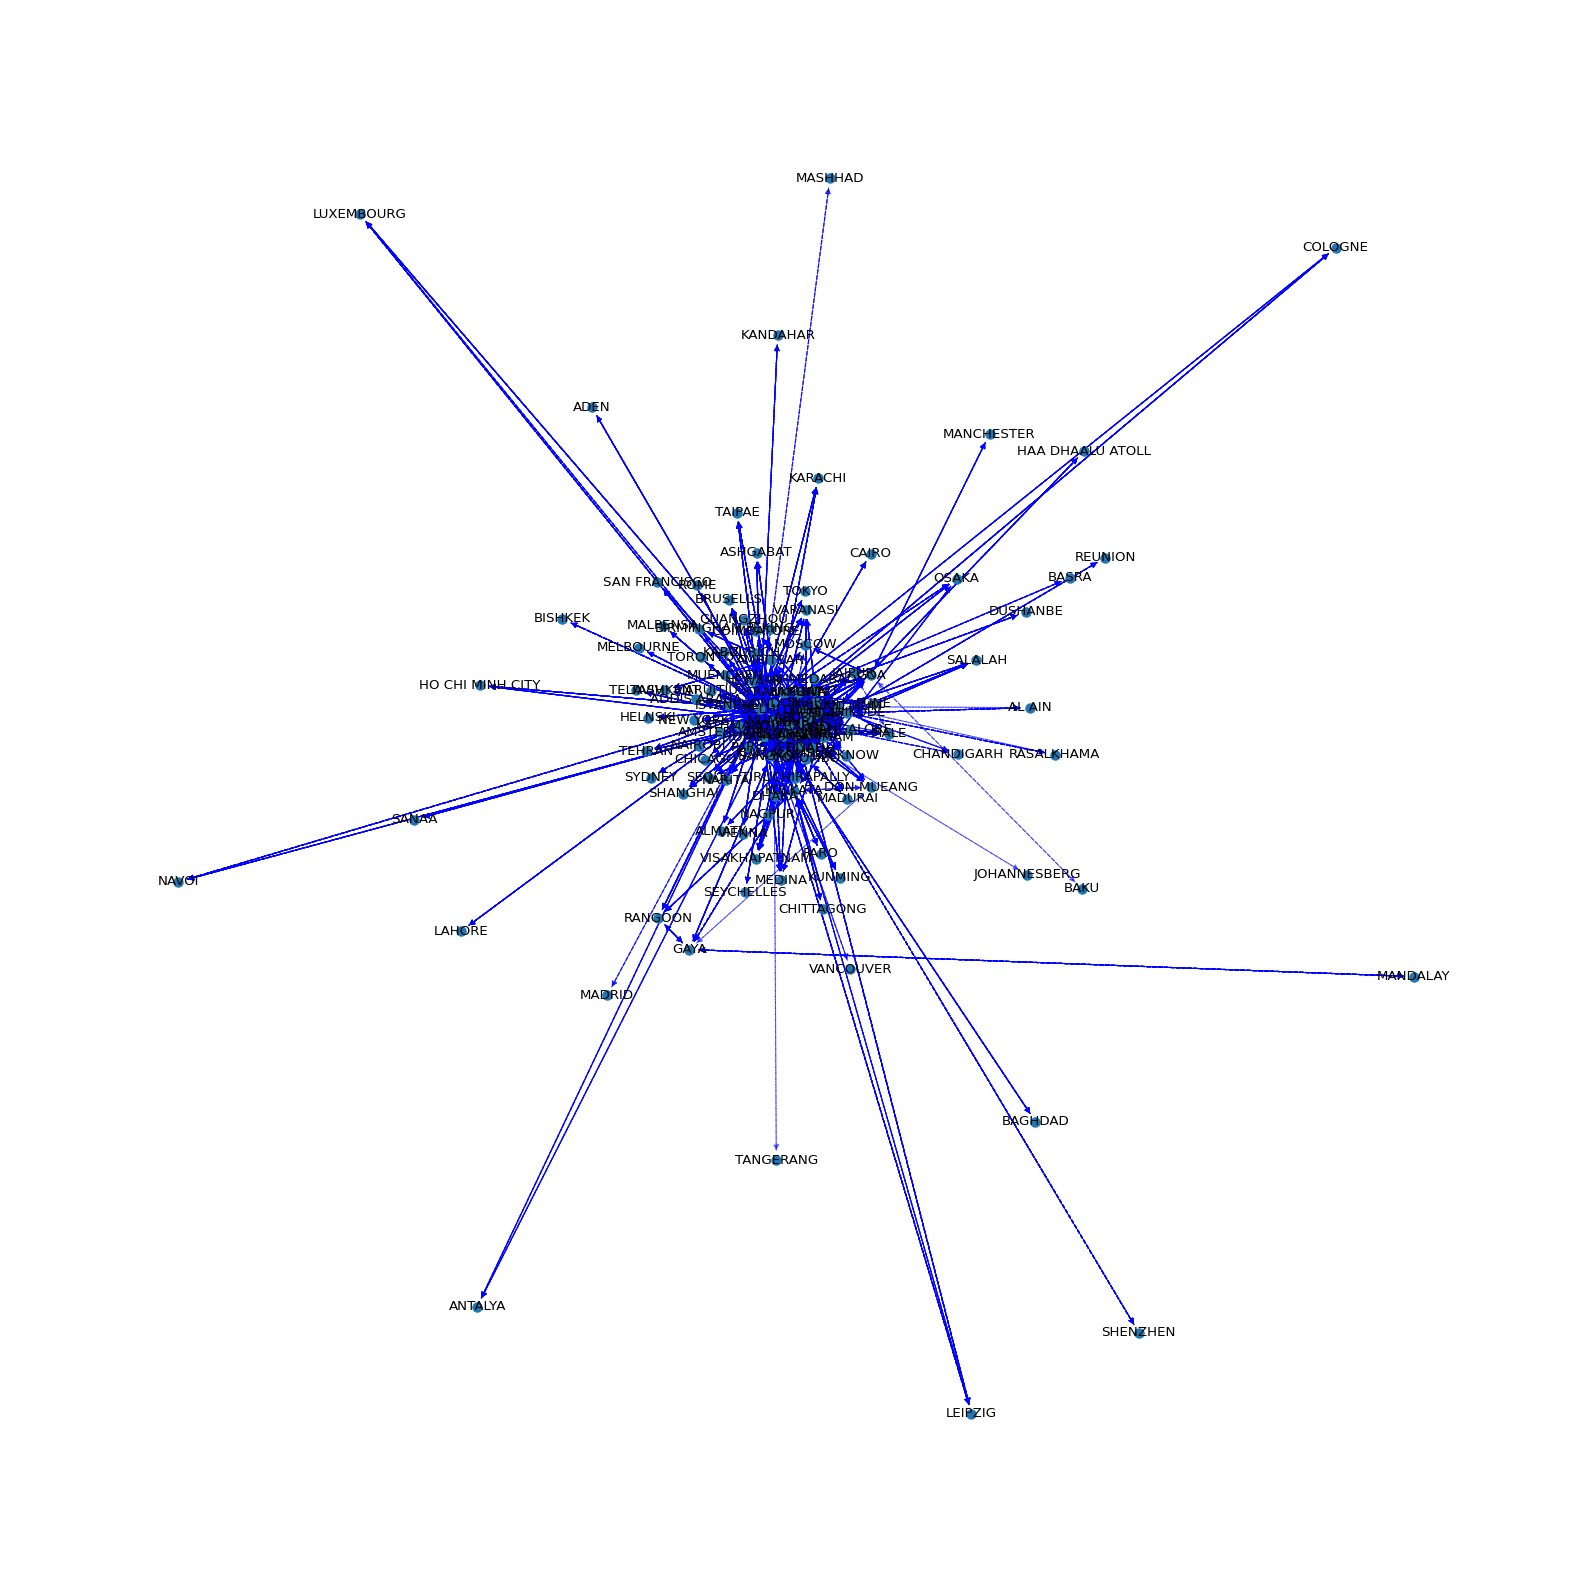

In [83]:
plt.figure(figsize=(20, 20), dpi=80)
elarge = [(u, v) for (u, v, d) in MDG.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in MDG.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(MDG, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(MDG, pos, node_size=70)

# edges
nx.draw_networkx_edges(MDG, pos, edgelist=elarge, width=2)
nx.draw_networkx_edges(
    MDG, pos, edgelist=esmall, width=1, alpha=0.5, edge_color="b", style="dashed"
)

# labels
nx.draw_networkx_labels(MDG, pos, font_size=12, font_family="sans-serif")

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

In [84]:
nx.in_degree_centrality(MDG)

{'ABUDHABI': 1.1551724137931034,
 'AHMEDABAD': 0.7758620689655172,
 'BENGALURU': 1.7844827586206897,
 'CHENNAI': 2.0,
 'DELHI': 5.310344827586206,
 'GOA': 0.7672413793103449,
 'HYDERABAD': 1.3879310344827587,
 'JAIPUR': 0.33620689655172414,
 'KOCHI': 1.2758620689655171,
 'KOLKATA': 1.1810344827586208,
 'KOZHIKODE': 0.9741379310344828,
 'LUCKNOW': 0.48275862068965514,
 'MANGALORE': 0.5689655172413793,
 'MUMBAI': 3.8448275862068964,
 'PUNE': 0.3103448275862069,
 'TRIVANDRUM': 1.1637931034482758,
 'ADDIS ABABA': 0.22413793103448276,
 'ADEN': 0.07758620689655173,
 'AL AIN': 0.08620689655172414,
 'ALMATY': 0.12931034482758622,
 'AMSTERDAM': 0.13793103448275862,
 'ASHGABAT': 0.15517241379310345,
 'AMRITSAR': 0.6206896551724138,
 'BAHRAIN': 0.6982758620689655,
 'BANGKOK': 0.7327586206896551,
 'GAYA': 0.3189655172413793,
 'VARANASI': 0.3103448275862069,
 'BIRMINGHAM': 0.15517241379310345,
 'BISHKEK': 0.07758620689655173,
 'BRUSELLS': 0.15517241379310345,
 'CAIRO': 0.07758620689655173,
 'CHICAG

In [85]:
nx.out_degree_centrality(MDG)

{'ABUDHABI': 1.1551724137931034,
 'AHMEDABAD': 0.7758620689655172,
 'BENGALURU': 1.7844827586206897,
 'CHENNAI': 2.0,
 'DELHI': 5.310344827586206,
 'GOA': 0.7672413793103449,
 'HYDERABAD': 1.3879310344827587,
 'JAIPUR': 0.33620689655172414,
 'KOCHI': 1.2758620689655171,
 'KOLKATA': 1.1810344827586208,
 'KOZHIKODE': 0.9741379310344828,
 'LUCKNOW': 0.48275862068965514,
 'MANGALORE': 0.5689655172413793,
 'MUMBAI': 3.8448275862068964,
 'PUNE': 0.3103448275862069,
 'TRIVANDRUM': 1.1637931034482758,
 'ADDIS ABABA': 0.22413793103448276,
 'ADEN': 0.07758620689655173,
 'AL AIN': 0.08620689655172414,
 'ALMATY': 0.12931034482758622,
 'AMSTERDAM': 0.13793103448275862,
 'ASHGABAT': 0.15517241379310345,
 'AMRITSAR': 0.6206896551724138,
 'BAHRAIN': 0.6982758620689655,
 'BANGKOK': 0.7327586206896551,
 'GAYA': 0.3189655172413793,
 'VARANASI': 0.3103448275862069,
 'BIRMINGHAM': 0.15517241379310345,
 'BISHKEK': 0.07758620689655173,
 'BRUSELLS': 0.15517241379310345,
 'CAIRO': 0.07758620689655173,
 'CHICAG

In [86]:
MDG.nodes

NodeView(('ABUDHABI', 'AHMEDABAD', 'BENGALURU', 'CHENNAI', 'DELHI', 'GOA', 'HYDERABAD', 'JAIPUR', 'KOCHI', 'KOLKATA', 'KOZHIKODE', 'LUCKNOW', 'MANGALORE', 'MUMBAI', 'PUNE', 'TRIVANDRUM', 'ADDIS ABABA', 'ADEN', 'AL AIN', 'ALMATY', 'AMSTERDAM', 'ASHGABAT', 'AMRITSAR', 'BAHRAIN', 'BANGKOK', 'GAYA', 'VARANASI', 'BIRMINGHAM', 'BISHKEK', 'BRUSELLS', 'CAIRO', 'CHICAGO', 'CHITTAGONG', 'COLOGNE', 'COLOMBO', 'MADURAI', 'TIRUCHIRAPALLY', 'DAMMAM', 'DHAKA', 'DOHA', 'DUBAI', 'VISAKHAPATNAM', 'DUSHANBE', 'FRANKFURT', 'GUANGZHOU', 'HAA DHAALU ATOLL', 'HELNSKI', 'HO CHI MINH CITY', 'HONG KONG', 'ISTANBUL', 'JEDDAH', 'JOHANNESBERG', 'KABUL', 'KARACHI', 'KATHMANDU', 'KUALALUMPUR', 'KUNMING', 'KUWAIT', 'LAHORE', 'LEIPZIG', 'LONDON', 'LUXEMBOURG', 'MALE', 'MALPENSA', 'MANDALAY', 'MARUITIUS', 'MEDINA', 'MELBOURNE', 'MOSCOW', 'MUENCHEN', 'MUSCAT', 'NAIROBI', 'NARITA', 'NAVOI', 'NEW YORK', 'NEWARK', 'OSAKA', 'PARIS', 'PARO', 'PEKING', 'RANGOON', 'RIYADH', 'ROME', 'SALALAH', 'SANAA', 'SEOUL', 'SEYCHELLES', 'S

In [87]:
MDG.in_edges

InMultiEdgeView([('AHMEDABAD', 'ABUDHABI', 0), ('AHMEDABAD', 'ABUDHABI', 1), ('AHMEDABAD', 'ABUDHABI', 2), ('AHMEDABAD', 'ABUDHABI', 3), ('AHMEDABAD', 'ABUDHABI', 4), ('AHMEDABAD', 'ABUDHABI', 5), ('AHMEDABAD', 'ABUDHABI', 6), ('AHMEDABAD', 'ABUDHABI', 7), ('AHMEDABAD', 'ABUDHABI', 8), ('BENGALURU', 'ABUDHABI', 0), ('BENGALURU', 'ABUDHABI', 1), ('BENGALURU', 'ABUDHABI', 2), ('BENGALURU', 'ABUDHABI', 3), ('BENGALURU', 'ABUDHABI', 4), ('BENGALURU', 'ABUDHABI', 5), ('BENGALURU', 'ABUDHABI', 6), ('BENGALURU', 'ABUDHABI', 7), ('BENGALURU', 'ABUDHABI', 8), ('CHENNAI', 'ABUDHABI', 0), ('CHENNAI', 'ABUDHABI', 1), ('CHENNAI', 'ABUDHABI', 2), ('CHENNAI', 'ABUDHABI', 3), ('CHENNAI', 'ABUDHABI', 4), ('CHENNAI', 'ABUDHABI', 5), ('CHENNAI', 'ABUDHABI', 6), ('CHENNAI', 'ABUDHABI', 7), ('CHENNAI', 'ABUDHABI', 8), ('DELHI', 'ABUDHABI', 0), ('DELHI', 'ABUDHABI', 1), ('DELHI', 'ABUDHABI', 2), ('DELHI', 'ABUDHABI', 3), ('DELHI', 'ABUDHABI', 4), ('DELHI', 'ABUDHABI', 5), ('DELHI', 'ABUDHABI', 6), ('DELHI',

In [88]:
MDG.out_edges

OutMultiEdgeView([('ABUDHABI', 'AHMEDABAD', 0), ('ABUDHABI', 'AHMEDABAD', 1), ('ABUDHABI', 'AHMEDABAD', 2), ('ABUDHABI', 'AHMEDABAD', 3), ('ABUDHABI', 'AHMEDABAD', 4), ('ABUDHABI', 'AHMEDABAD', 5), ('ABUDHABI', 'AHMEDABAD', 6), ('ABUDHABI', 'AHMEDABAD', 7), ('ABUDHABI', 'AHMEDABAD', 8), ('ABUDHABI', 'BENGALURU', 0), ('ABUDHABI', 'BENGALURU', 1), ('ABUDHABI', 'BENGALURU', 2), ('ABUDHABI', 'BENGALURU', 3), ('ABUDHABI', 'BENGALURU', 4), ('ABUDHABI', 'BENGALURU', 5), ('ABUDHABI', 'BENGALURU', 6), ('ABUDHABI', 'BENGALURU', 7), ('ABUDHABI', 'BENGALURU', 8), ('ABUDHABI', 'CHENNAI', 0), ('ABUDHABI', 'CHENNAI', 1), ('ABUDHABI', 'CHENNAI', 2), ('ABUDHABI', 'CHENNAI', 3), ('ABUDHABI', 'CHENNAI', 4), ('ABUDHABI', 'CHENNAI', 5), ('ABUDHABI', 'CHENNAI', 6), ('ABUDHABI', 'CHENNAI', 7), ('ABUDHABI', 'CHENNAI', 8), ('ABUDHABI', 'DELHI', 0), ('ABUDHABI', 'DELHI', 1), ('ABUDHABI', 'DELHI', 2), ('ABUDHABI', 'DELHI', 3), ('ABUDHABI', 'DELHI', 4), ('ABUDHABI', 'DELHI', 5), ('ABUDHABI', 'DELHI', 6), ('ABUDHA

In [89]:
MDG.adj

MultiAdjacencyView({'ABUDHABI': {'AHMEDABAD': {0: {'weight': 0.041930980108736714}, 1: {'weight': 0.0659318999359406}, 2: {'weight': 0.05957195184047568}, 3: {'weight': 0.07623067952234687}, 4: {'weight': 0.08492633169625992}, 5: {'weight': 0.08351702501601485}, 6: {'weight': 0.09112531003104417}, 7: {'weight': 0.06027496263201984}, 8: {'weight': 0.061733545769616135}}, 'BENGALURU': {0: {'weight': 0.0898178413626583}, 1: {'weight': 0.10158834447528786}, 2: {'weight': 0.10943972667991655}, 3: {'weight': 0.12064847817874214}, 4: {'weight': 0.11583909594126246}, 5: {'weight': 0.10188071812223846}, 6: {'weight': 0.12281335720503934}, 7: {'weight': 0.10673937681706937}, 8: {'weight': 0.11949869417388019}}, 'CHENNAI': {0: {'weight': 0.10432154530970253}, 1: {'weight': 0.0980897160033508}, 2: {'weight': 0.12416024703930618}, 3: {'weight': 0.13469226852384159}, 4: {'weight': 0.1409076723444096}, 5: {'weight': 0.12312544143493044}, 6: {'weight': 0.15286871109213054}, 7: {'weight': 0.15932721210

In [90]:
MDG.degree

DiMultiDegreeView({'ABUDHABI': 268, 'AHMEDABAD': 180, 'BENGALURU': 414, 'CHENNAI': 464, 'DELHI': 1232, 'GOA': 178, 'HYDERABAD': 322, 'JAIPUR': 78, 'KOCHI': 296, 'KOLKATA': 274, 'KOZHIKODE': 226, 'LUCKNOW': 112, 'MANGALORE': 132, 'MUMBAI': 892, 'PUNE': 72, 'TRIVANDRUM': 270, 'ADDIS ABABA': 52, 'ADEN': 18, 'AL AIN': 20, 'ALMATY': 30, 'AMSTERDAM': 32, 'ASHGABAT': 36, 'AMRITSAR': 144, 'BAHRAIN': 162, 'BANGKOK': 170, 'GAYA': 74, 'VARANASI': 72, 'BIRMINGHAM': 36, 'BISHKEK': 18, 'BRUSELLS': 36, 'CAIRO': 18, 'CHICAGO': 36, 'CHITTAGONG': 18, 'COLOGNE': 30, 'COLOMBO': 194, 'MADURAI': 36, 'TIRUCHIRAPALLY': 78, 'DAMMAM': 162, 'DHAKA': 72, 'DOHA': 244, 'DUBAI': 348, 'VISAKHAPATNAM': 60, 'DUSHANBE': 18, 'FRANKFURT': 136, 'GUANGZHOU': 36, 'HAA DHAALU ATOLL': 18, 'HELNSKI': 18, 'HO CHI MINH CITY': 32, 'HONG KONG': 104, 'ISTANBUL': 36, 'JEDDAH': 144, 'JOHANNESBERG': 2, 'KABUL': 18, 'KARACHI': 36, 'KATHMANDU': 86, 'KUALALUMPUR': 202, 'KUNMING': 30, 'KUWAIT': 194, 'LAHORE': 18, 'LEIPZIG': 44, 'LONDON': 1

In [91]:
MDG.in_degree

InMultiDegreeView({'ABUDHABI': 134, 'AHMEDABAD': 90, 'BENGALURU': 207, 'CHENNAI': 232, 'DELHI': 616, 'GOA': 89, 'HYDERABAD': 161, 'JAIPUR': 39, 'KOCHI': 148, 'KOLKATA': 137, 'KOZHIKODE': 113, 'LUCKNOW': 56, 'MANGALORE': 66, 'MUMBAI': 446, 'PUNE': 36, 'TRIVANDRUM': 135, 'ADDIS ABABA': 26, 'ADEN': 9, 'AL AIN': 10, 'ALMATY': 15, 'AMSTERDAM': 16, 'ASHGABAT': 18, 'AMRITSAR': 72, 'BAHRAIN': 81, 'BANGKOK': 85, 'GAYA': 37, 'VARANASI': 36, 'BIRMINGHAM': 18, 'BISHKEK': 9, 'BRUSELLS': 18, 'CAIRO': 9, 'CHICAGO': 18, 'CHITTAGONG': 9, 'COLOGNE': 15, 'COLOMBO': 97, 'MADURAI': 18, 'TIRUCHIRAPALLY': 39, 'DAMMAM': 81, 'DHAKA': 36, 'DOHA': 122, 'DUBAI': 174, 'VISAKHAPATNAM': 30, 'DUSHANBE': 9, 'FRANKFURT': 68, 'GUANGZHOU': 18, 'HAA DHAALU ATOLL': 9, 'HELNSKI': 9, 'HO CHI MINH CITY': 16, 'HONG KONG': 52, 'ISTANBUL': 18, 'JEDDAH': 72, 'JOHANNESBERG': 1, 'KABUL': 9, 'KARACHI': 18, 'KATHMANDU': 43, 'KUALALUMPUR': 101, 'KUNMING': 15, 'KUWAIT': 97, 'LAHORE': 9, 'LEIPZIG': 22, 'LONDON': 69, 'LUXEMBOURG': 22, 'M

In [92]:
MDG.out_degree

OutMultiDegreeView({'ABUDHABI': 134, 'AHMEDABAD': 90, 'BENGALURU': 207, 'CHENNAI': 232, 'DELHI': 616, 'GOA': 89, 'HYDERABAD': 161, 'JAIPUR': 39, 'KOCHI': 148, 'KOLKATA': 137, 'KOZHIKODE': 113, 'LUCKNOW': 56, 'MANGALORE': 66, 'MUMBAI': 446, 'PUNE': 36, 'TRIVANDRUM': 135, 'ADDIS ABABA': 26, 'ADEN': 9, 'AL AIN': 10, 'ALMATY': 15, 'AMSTERDAM': 16, 'ASHGABAT': 18, 'AMRITSAR': 72, 'BAHRAIN': 81, 'BANGKOK': 85, 'GAYA': 37, 'VARANASI': 36, 'BIRMINGHAM': 18, 'BISHKEK': 9, 'BRUSELLS': 18, 'CAIRO': 9, 'CHICAGO': 18, 'CHITTAGONG': 9, 'COLOGNE': 15, 'COLOMBO': 97, 'MADURAI': 18, 'TIRUCHIRAPALLY': 39, 'DAMMAM': 81, 'DHAKA': 36, 'DOHA': 122, 'DUBAI': 174, 'VISAKHAPATNAM': 30, 'DUSHANBE': 9, 'FRANKFURT': 68, 'GUANGZHOU': 18, 'HAA DHAALU ATOLL': 9, 'HELNSKI': 9, 'HO CHI MINH CITY': 16, 'HONG KONG': 52, 'ISTANBUL': 18, 'JEDDAH': 72, 'JOHANNESBERG': 1, 'KABUL': 9, 'KARACHI': 18, 'KATHMANDU': 43, 'KUALALUMPUR': 101, 'KUNMING': 15, 'KUWAIT': 97, 'LAHORE': 9, 'LEIPZIG': 22, 'LONDON': 69, 'LUXEMBOURG': 22, '

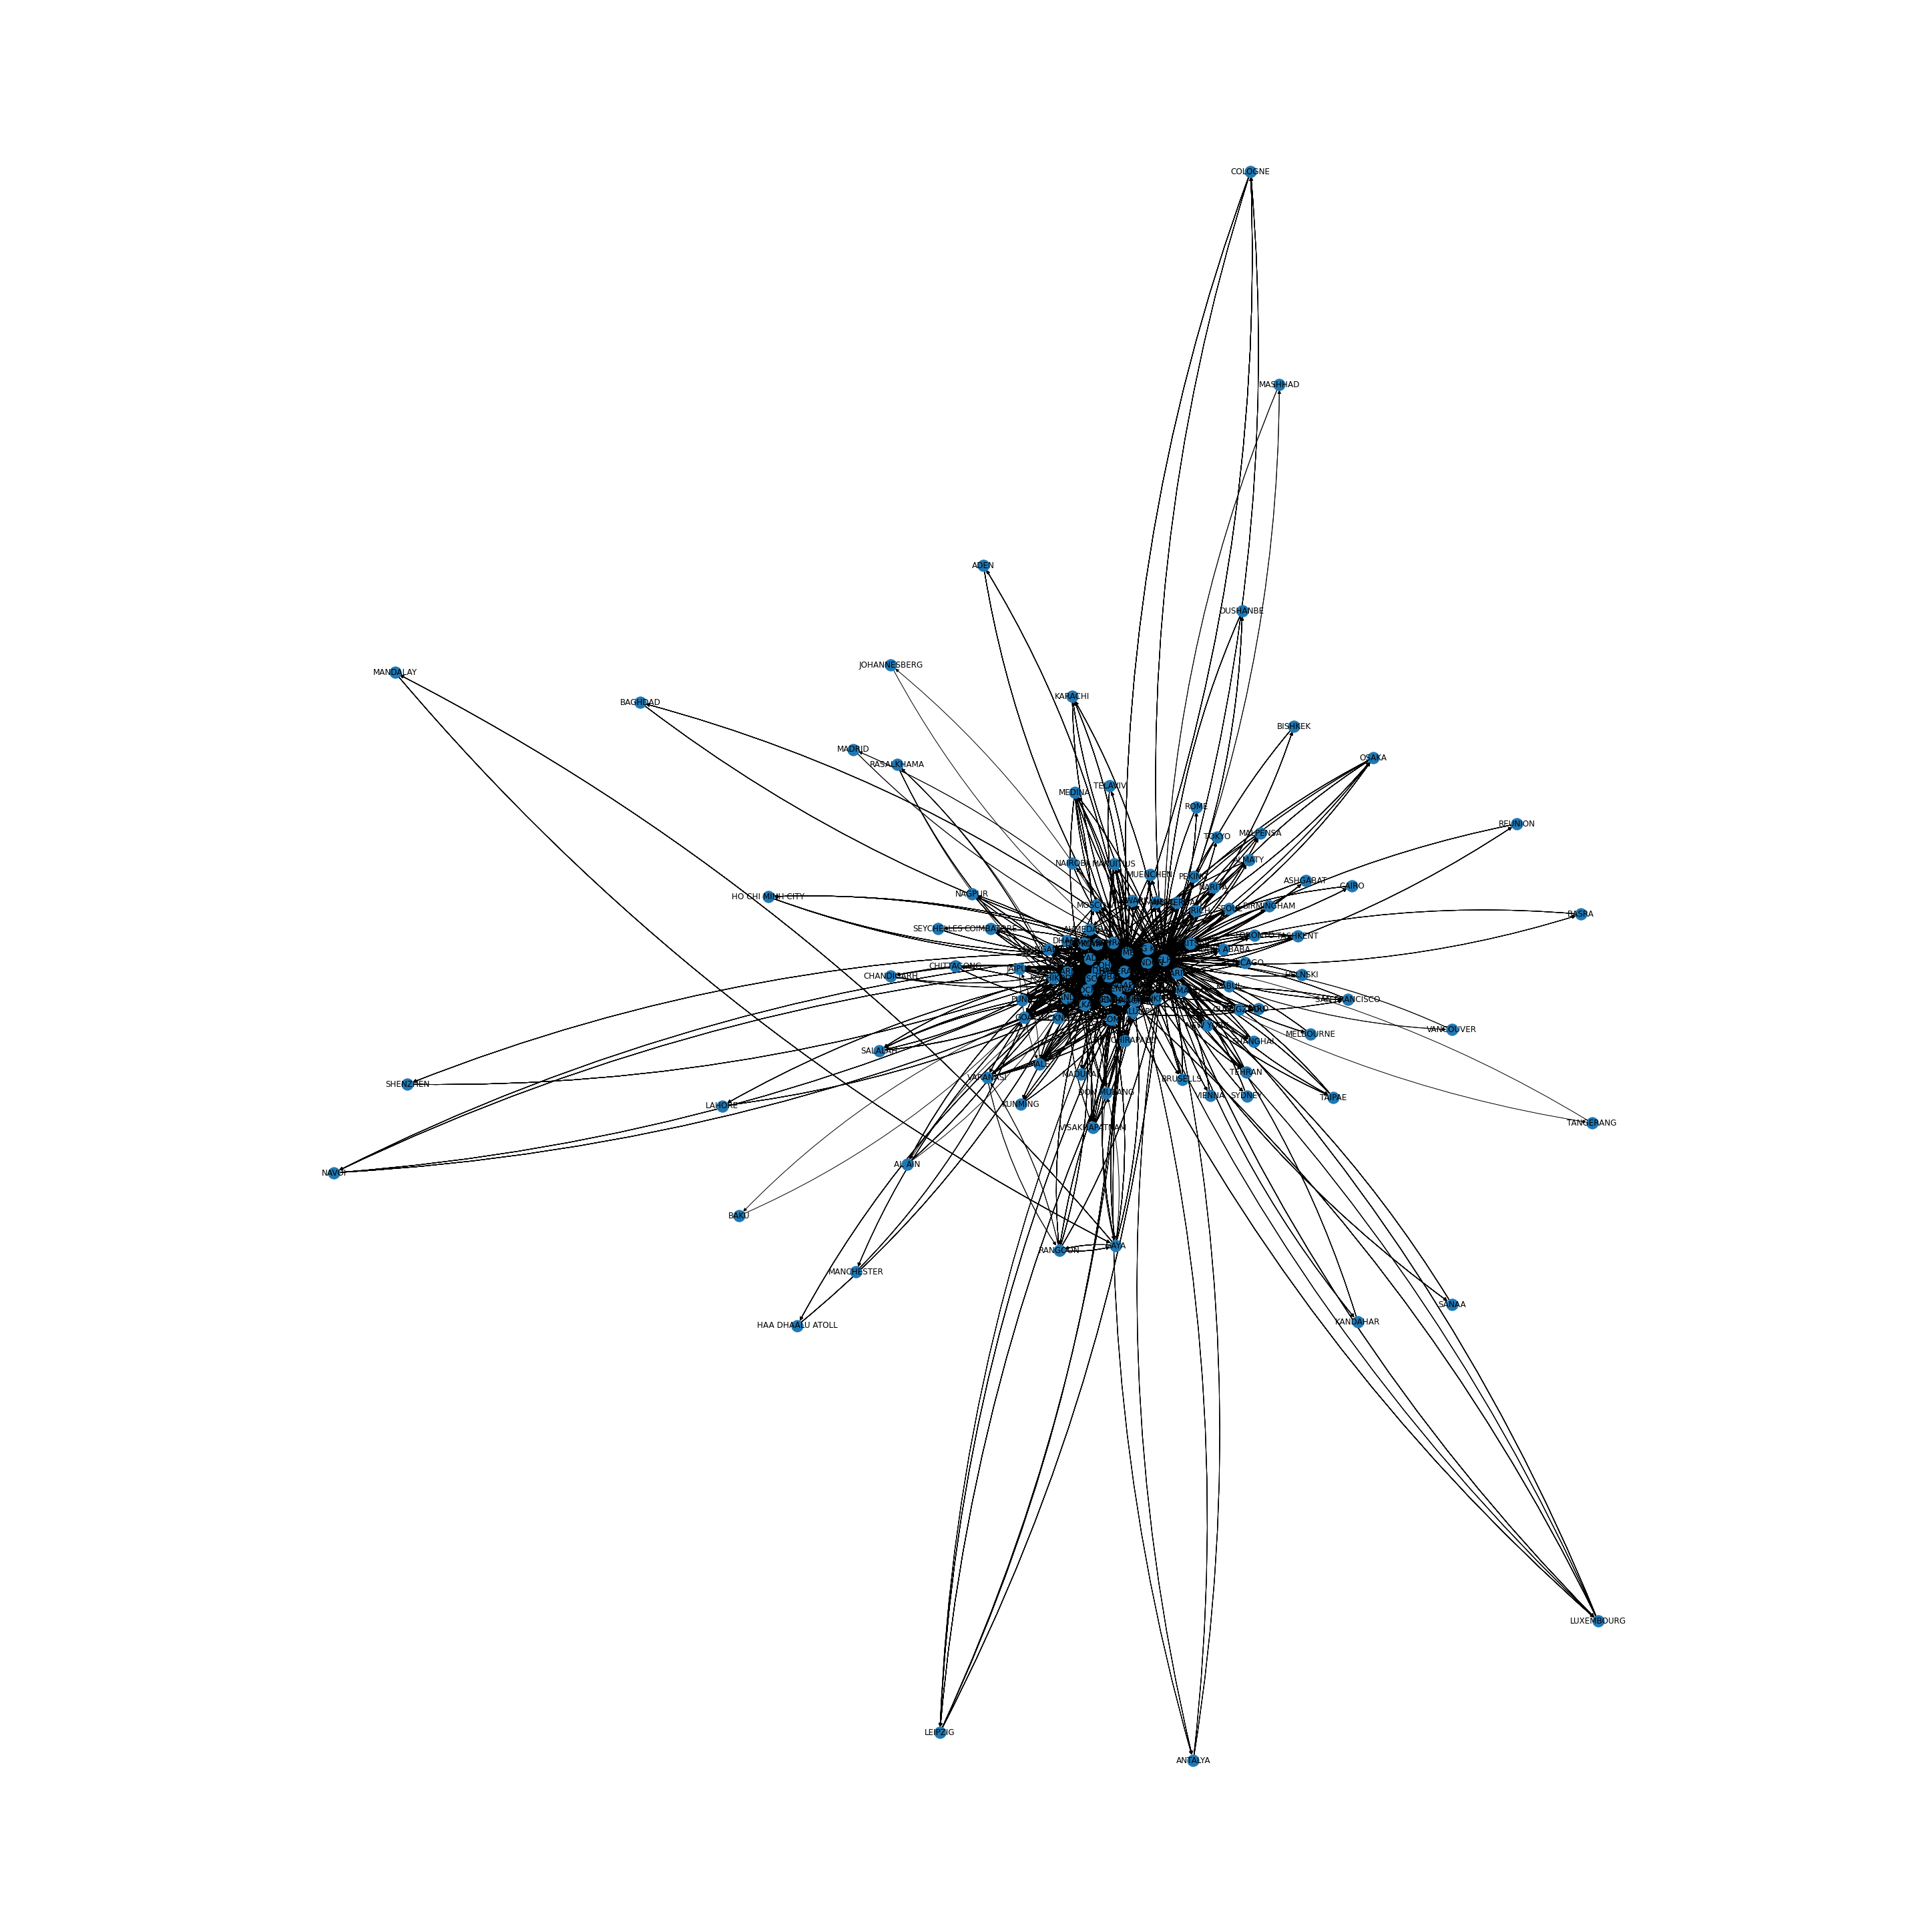

In [93]:
pos = nx.spring_layout(MDG)
fig = plt.figure(figsize=(40, 40)) 
nx.draw(MDG, pos, with_labels=True, connectionstyle='arc3, rad = 0.1')
edge_labels=dict([((u,v,),d['weight'])
             for u,v,d in MDG.edges(data=True)])
plt.axis('equal') 
plt.show() 
fig.savefig('cityTrafficNetwork.svg') 

In [94]:
nx.eigenvector_centrality(DG12)

{'ABUDHABI': 9.776204996427335e-05,
 'AHMEDABAD': 0.09199408901638104,
 'BENGALURU': 0.22064894676936442,
 'CHENNAI': 0.2482178448592903,
 'DELHI': 0.6801305816014552,
 'GOA': 0.11037335440966438,
 'HYDERABAD': 0.17470078328615604,
 'JAIPUR': 0.055235558229814435,
 'KOCHI': 0.15632151789287269,
 'KOLKATA': 0.15632151789287269,
 'KOZHIKODE': 0.11956298710630611,
 'LUCKNOW': 0.07361482362309775,
 'MANGALORE': 0.07361482362309775,
 'MUMBAI': 0.5055275603652616,
 'PUNE': 0.03685629283653105,
 'TRIVANDRUM': 0.15632151789287269,
 'ADDIS ABABA': 9.776204996427335e-05,
 'ADEN': 9.776204996427335e-05,
 'AL AIN': 9.776204996427335e-05,
 'ALMATY': 9.776204996427335e-05,
 'AMSTERDAM': 9.776204996427335e-05,
 'ASHGABAT': 9.776204996427335e-05,
 'AMRITSAR': 0.09199408901638104,
 'BAHRAIN': 9.776204996427335e-05,
 'BANGKOK': 9.776204996427335e-05,
 'GAYA': 0.04604592553317275,
 'VARANASI': 0.04604592553317275,
 'BIRMINGHAM': 9.776204996427335e-05,
 'BISHKEK': 9.776204996427335e-05,
 'BRUSELLS': 9.776

In [95]:
nx.eigenvector_centrality(DG21, max_iter=1000)

{'AHMEDABAD': 0.00015322317099288678,
 'ABUDHABI': 0.27365658339329596,
 'BENGALURU': 0.00015322317099288678,
 'CHENNAI': 0.00015322317099288678,
 'DELHI': 0.00015322317099288678,
 'GOA': 0.00015322317099288678,
 'HYDERABAD': 0.00015322317099288678,
 'JAIPUR': 0.00015322317099288678,
 'KOCHI': 0.00015322317099288678,
 'KOLKATA': 0.00015322317099288678,
 'KOZHIKODE': 0.00015322317099288678,
 'LUCKNOW': 0.00015322317099288678,
 'MANGALORE': 0.00015322317099288678,
 'MUMBAI': 0.00015322317099288678,
 'PUNE': 0.00015322317099288678,
 'TRIVANDRUM': 0.00015322317099288678,
 'ADDIS ABABA': 0.054853895215453544,
 'ADEN': 0.01838678051914644,
 'AL AIN': 0.03662033786729999,
 'ALMATY': 0.03662033786729999,
 'AMSTERDAM': 0.054853895215453544,
 'AMRITSAR': 0.00015322317099288678,
 'ASHGABAT': 0.03662033786729999,
 'BAHRAIN': 0.1642552393043753,
 'BANGKOK': 0.20072235400068245,
 'GAYA': 0.00015322317099288678,
 'VARANASI': 0.00015322317099288678,
 'BIRMINGHAM': 0.03662033786729999,
 'BISHKEK': 0.01

In [96]:
nx.closeness_centrality(MDG)

{'ABUDHABI': 0.5087719298245614,
 'AHMEDABAD': 0.380327868852459,
 'BENGALURU': 0.4187725631768953,
 'CHENNAI': 0.4280442804428044,
 'DELHI': 0.655367231638418,
 'GOA': 0.380327868852459,
 'HYDERABAD': 0.40418118466898956,
 'JAIPUR': 0.3706070287539936,
 'KOCHI': 0.39862542955326463,
 'KOLKATA': 0.39862542955326463,
 'KOZHIKODE': 0.38283828382838286,
 'LUCKNOW': 0.37540453074433655,
 'MANGALORE': 0.3706070287539936,
 'MUMBAI': 0.5395348837209303,
 'PUNE': 0.3613707165109034,
 'TRIVANDRUM': 0.39862542955326463,
 'ADDIS ABABA': 0.43609022556390975,
 'ADEN': 0.3515151515151515,
 'AL AIN': 0.2885572139303483,
 'ALMATY': 0.40559440559440557,
 'AMSTERDAM': 0.43609022556390975,
 'ASHGABAT': 0.4,
 'AMRITSAR': 0.37540453074433655,
 'BAHRAIN': 0.4715447154471545,
 'BANGKOK': 0.4715447154471545,
 'GAYA': 0.34421364985163205,
 'VARANASI': 0.3682539682539683,
 'BIRMINGHAM': 0.4,
 'BISHKEK': 0.3972602739726027,
 'BRUSELLS': 0.4264705882352941,
 'CAIRO': 0.3515151515151515,
 'CHICAGO': 0.4,
 'CHITTAG

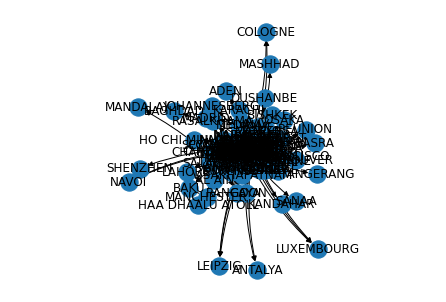

In [97]:
nx.draw(DG21, pos, with_labels=True, connectionstyle='arc3, rad = 0.1')
edge_labels=dict([((u,v,),d['weight'])
             for u,v,d in MDG.edges(data=True)])
plt.axis('equal') 
plt.show() 

In [98]:
nx.betweenness_centrality(G)

{'ABUDHABI': 0.02965400017749279,
 'AHMEDABAD': 0.003502124864752629,
 'BENGALURU': 0.026385506643405644,
 'CHENNAI': 0.04746999572855074,
 'DELHI': 0.5194158721675942,
 'GOA': 0.03924338904979626,
 'HYDERABAD': 0.014911045728131124,
 'JAIPUR': 0.0009761243802485486,
 'KOCHI': 0.016453148245605297,
 'KOLKATA': 0.034327874753704156,
 'KOZHIKODE': 0.020178547802871934,
 'LUCKNOW': 0.0016154765030639228,
 'MANGALORE': 0.0011289698623627412,
 'MUMBAI': 0.27114397312898286,
 'PUNE': 0.0003592057682940828,
 'TRIVANDRUM': 0.04655680479626339,
 'ADDIS ABABA': 0.001632301097863998,
 'ADEN': 0.0,
 'AL AIN': 3.736451353236035e-05,
 'ALMATY': 0.0017720303601110412,
 'AMSTERDAM': 0.001632301097863998,
 'ASHGABAT': 0.0005962909700470743,
 'AMRITSAR': 0.007599477084102243,
 'BAHRAIN': 0.01087217391536128,
 'BANGKOK': 0.02571808307486854,
 'GAYA': 0.018040156337415993,
 'VARANASI': 0.0015090857758221744,
 'BIRMINGHAM': 0.0005962909700470743,
 'BISHKEK': 0.0,
 'BRUSELLS': 0.0008739684171712054,
 'CAIRO

In [99]:
nx.average_shortest_path_length(MDG)

2.517536103743

In [100]:
nx.pagerank_numpy(DG12)

{'ABUDHABI': 0.005356186395286574,
 'AHMEDABAD': 0.006921278899487179,
 'BENGALURU': 0.014851361101881422,
 'CHENNAI': 0.0209810611711548,
 'DELHI': 0.18290587292763807,
 'GOA': 0.01040426442265997,
 'HYDERABAD': 0.011108358915373494,
 'JAIPUR': 0.005796076242842705,
 'KOCHI': 0.0172855952488775,
 'KOLKATA': 0.023212289915499125,
 'KOZHIKODE': 0.02026175728725434,
 'LUCKNOW': 0.006575959195138676,
 'MANGALORE': 0.0063334797328987325,
 'MUMBAI': 0.09412860436881458,
 'PUNE': 0.005593982611002523,
 'TRIVANDRUM': 0.01655745893134999,
 'ADDIS ABABA': 0.005356186395286556,
 'ADEN': 0.005356186395286556,
 'AL AIN': 0.005356186395286556,
 'ALMATY': 0.005356186395286556,
 'AMSTERDAM': 0.005356186395286556,
 'ASHGABAT': 0.005356186395286556,
 'AMRITSAR': 0.009734390585959861,
 'BAHRAIN': 0.005356186395286556,
 'BANGKOK': 0.005356186395286556,
 'GAYA': 0.006304288926258301,
 'VARANASI': 0.007799555596336968,
 'BIRMINGHAM': 0.005356186395286567,
 'BISHKEK': 0.005356186395286567,
 'BRUSELLS': 0.00

In [101]:
nx.pagerank_numpy(DG21)

{'AHMEDABAD': 0.007278020378457034,
 'ABUDHABI': 0.018999038376819943,
 'BENGALURU': 0.00727802037845704,
 'CHENNAI': 0.0072780203784570535,
 'DELHI': 0.0072780203784570535,
 'GOA': 0.0072780203784570535,
 'HYDERABAD': 0.0072780203784570535,
 'JAIPUR': 0.0072780203784570535,
 'KOCHI': 0.0072780203784570535,
 'KOLKATA': 0.0072780203784570535,
 'KOZHIKODE': 0.0072780203784570535,
 'LUCKNOW': 0.0072780203784570535,
 'MANGALORE': 0.0072780203784570665,
 'MUMBAI': 0.0072780203784570665,
 'PUNE': 0.0072780203784570665,
 'TRIVANDRUM': 0.0072780203784570535,
 'ADDIS ABABA': 0.007456435300524049,
 'ADEN': 0.007278633048072945,
 'AL AIN': 0.007383921896278516,
 'ALMATY': 0.007302753595363129,
 'AMSTERDAM': 0.007504690777613966,
 'AMRITSAR': 0.0072780203784570535,
 'ASHGABAT': 0.007903437262073702,
 'BAHRAIN': 0.008778077029755107,
 'BANGKOK': 0.0108033850838755,
 'GAYA': 0.0072780203784570535,
 'VARANASI': 0.0072780203784570535,
 'BIRMINGHAM': 0.007859853218026205,
 'BISHKEK': 0.0072879010961087